In [2]:


import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy as sp
plt.rcParams['figure.dpi']=300


#params = {"text.usetex" : True,
#          "font.family" : "serif",
#          "font.serif" : ["cmr10"],
#          "font.size": 12
#         }
# #plt.rcParams['axes.formatter.use_mathtext'] = True
# import os
# os.environ["PATH"]
# os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin/'

#plt.rcParams.update(params)
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from JINAPyCEE import omega_plus
from NuPyCEE import sygma
import stellab
table = 'yield_tables/agb_and_massive_stars_nugrid_MESAonly_fryer12delay.txt'
#%pylab ipympl
%matplotlib inline

# Create an instance of Stellab
sl = stellab.stellab()

# Load the functions for extracting abundances distributions
%run script_solar_ab.py


([Côté et al. 2018](http://adsabs.harvard.edu/abs/2018ApJ...859...67C)).([Kubryk et al. 2015](http://adsabs.harvard.edu/abs/2015A%26A...580A.126K)).

**Open-source Python packages**
* [NuPyCEE](https://github.com/NuGrid/NuPyCEE) - NuGrid Python Chemical Evolution Environment
* [JINAPyCEE](https://github.com/becot85/JINAPyCEE) - JINA Python Chemical Evolution Environment

### Key Equation for Star Formation

The global star formation rate ($\dot{M}_\star$) inside the galaxy model at time $t$ depends on the mass of gas $M_{gas}$ inside the galaxy, the star formation efficiency $f_\star$, and the star formation timescale $\tau_\star$ (e.g., <a href="http://adsabs.harvard.edu/abs/2006RPPh...69.3101B">Baugh 2006</a>; <a href="http://adsabs.harvard.edu/abs/2015ARA%26A..53...51S">Somerville & Davé 2015</a>).

$$\dot{M}_\star(t)=f_\star\frac{M_\mathrm{gas}(t)}{\tau_\star}\quad\mbox{[M$_\odot$ yr$^{-1}$]}$$

[Chiappini et al. (1997)](http://adsabs.harvard.edu/abs/1997ApJ...477..765C).

In [3]:
# Star formation efficiency (f_\star) --> [dimensionless]
sfe = 0.01

# Star formation timescale (\tau_\star) --> [yr]
t_star = 1.0e8

# Galactic inflow rate
# Magnitude (strength) of the inflow rate
in_mag = 1.0

# !! Do not modify !! as a first pass..
exp_infall = [[in_mag*40, 0.0, 0.8e9], [in_mag*5, 1.0e9, 7.0e9]]

# Run OMEGA+ with the first set of parameters
o_1 = omega_plus.omega_plus(sfe=sfe, t_star=t_star, exp_infall=exp_infall, special_timesteps=90)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 1.75s
   OMEGA+ run completed - Run time: 1.82s


In [4]:
# Set of parameters for the second run
# !! Please modify whatever you want !!
sfe = 0.013
t_star = 0.7e8
in_mag = 1.35

# Run OMEGA+ with the second set of parameters
exp_infall = [[in_mag*40, 0.0, 0.8e9], [in_mag*5, 1.0e9, 7.0e9]]
o_2 = omega_plus.omega_plus(sfe=sfe, t_star=t_star, exp_infall=exp_infall, special_timesteps=1000)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 56.62s
   OMEGA+ run completed - Run time: 56.62s




The estimated total stellar mass of the Milky Way is about $5\times10^{10}$ M$_\odot$.

The current star formation rate (SFR) is about 2 M$_\odot$ yr$^{-1}$. This is the value your model should have at the end of the simulation (at a Galactic age $t=13$ Gyr).

**Useful Information:** With a higher star formation efficiency, the gas reservoir will be converted into stars more rapidly.

**Useful Information:** The magnitude of the star formation rate is very sensitive to the galactic inflow rate.

In [5]:
# Print the total stellar mass formed
print("Integrated stellar mass for Run 1:",'%.2e'%sum(o_1.inner.history.m_locked),'M_sun')
print("Integrated stellar mass for Run 2:",'%.2e'%sum(o_2.inner.history.m_locked),'M_sun')

Integrated stellar mass for Run 1: 3.11e+10 M_sun
Integrated stellar mass for Run 2: 4.89e+10 M_sun


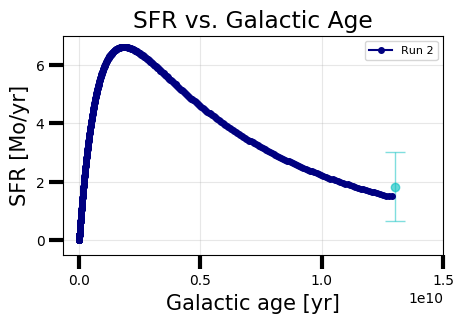

In [6]:
# Plot the evolution of the star formation rate (SFR)
# using the OMEGA plotting function.
ifig =1; plt.close(ifig); plt.figure(ifig, figsize=(8,3),dpi=100)
#tight_layout(pad=2)
#o_1.inner.plot_star_formation_rate(fig=ifig,color='r', marker='.', label='Run 1')
o_2.inner.plot_star_formation_rate(fig=ifig,color='navy', marker='.', label='Run 2')
plt.xlabel('Galactic age [yr]')
plt.title("SFR vs. Galactic Age")
plt.legend(loc='upper right', fontsize=8)
# Plot the observational constraint (cyan color)
plt.errorbar(13e9, 1.825, yerr=[1.175], linewidth=1, color='c', alpha=0.5, capsize=7)
plt.scatter([13e9], [1.825], color='c', alpha=0.6)



plt.xticks(np.arange(0, 2e10, step=5000000000))
plt.ylim(-0.5, 7)
plt.grid(alpha=0.3)
plt.show()

#### The current total mass of gas in the Milky Way is about $7\times10^{9}$ M$_\odot$. This is the value your model should have at the end of the simulation (at a Galactic age $t=13$ Gyr).

**Useful Information:** The mass of gas depends strongly on the galactic inflow rate.

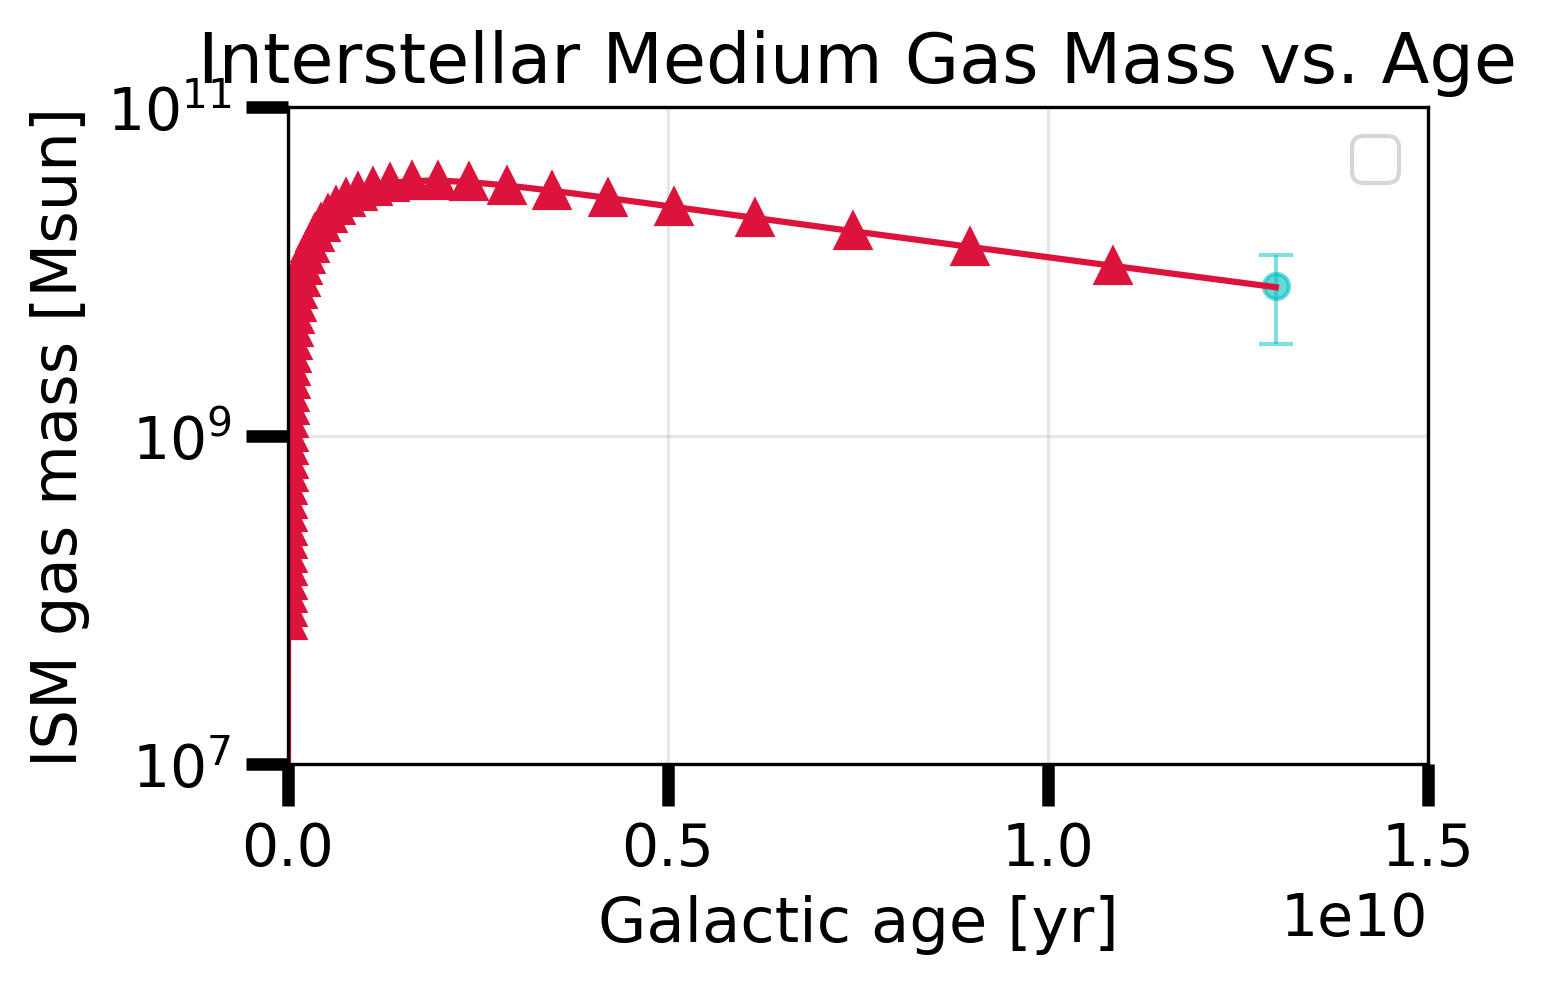

In [7]:
# Plot the evolution of the mass of gas in the
# interstellar medium (ISM) using the OMEGA plotting function.
#%matplotlib nbagg
ifig =4; plt.close(ifig); plt.figure(ifig, figsize=(8,3),dpi=300)
plt.tight_layout(pad=-5)

#o_1.inner.plot_totmasses(fig=ifig,color='r', marker='o', label='Run 1')
o_2.inner.plot_totmasses(fig=ifig,color='crimson', marker='^', label='Run 2')
plt.xscale('linear')
plt.xlabel('Galactic age [yr]')

# Plot the observational constraint (cyan color)
#plt.plot([12.9e9,12.9e9], [3.6e9,12.6e9], linewidth=6, color='c', alpha=0.5)
plt.ylim(10**7, 10**11)
plt.xticks(np.arange(0, 2e10, step=5000000000))
plt.legend([])
plt.grid(alpha=0.3)
plt.title('Interstellar Medium Gas Mass vs. Age')
plt.errorbar(13e9, 8.1e9, yerr=[4.5e9], linewidth=1, color='c', alpha=0.5, capsize=4)
plt.scatter([13e9], [8.1e9], color='c', alpha=0.6)
plt.show()

### Plot the Evolution of Iron Abundance [Fe/H]

$[A/B]=\log(n_A/n_B)-\log(n_A/n_B)_\odot$

To represent the solar neighbourhood, [Fe/H] in your model should reach zero (solar value) about 4.6 Gyr before the end of the simulation, representing the moment the Sun formed.

**Useful Information:** The [Fe/H] is mostly sensitive to the star formation efficiency. In other words, it is sensitive to the mass of gas (H) in which stars inject their metals (Fe).

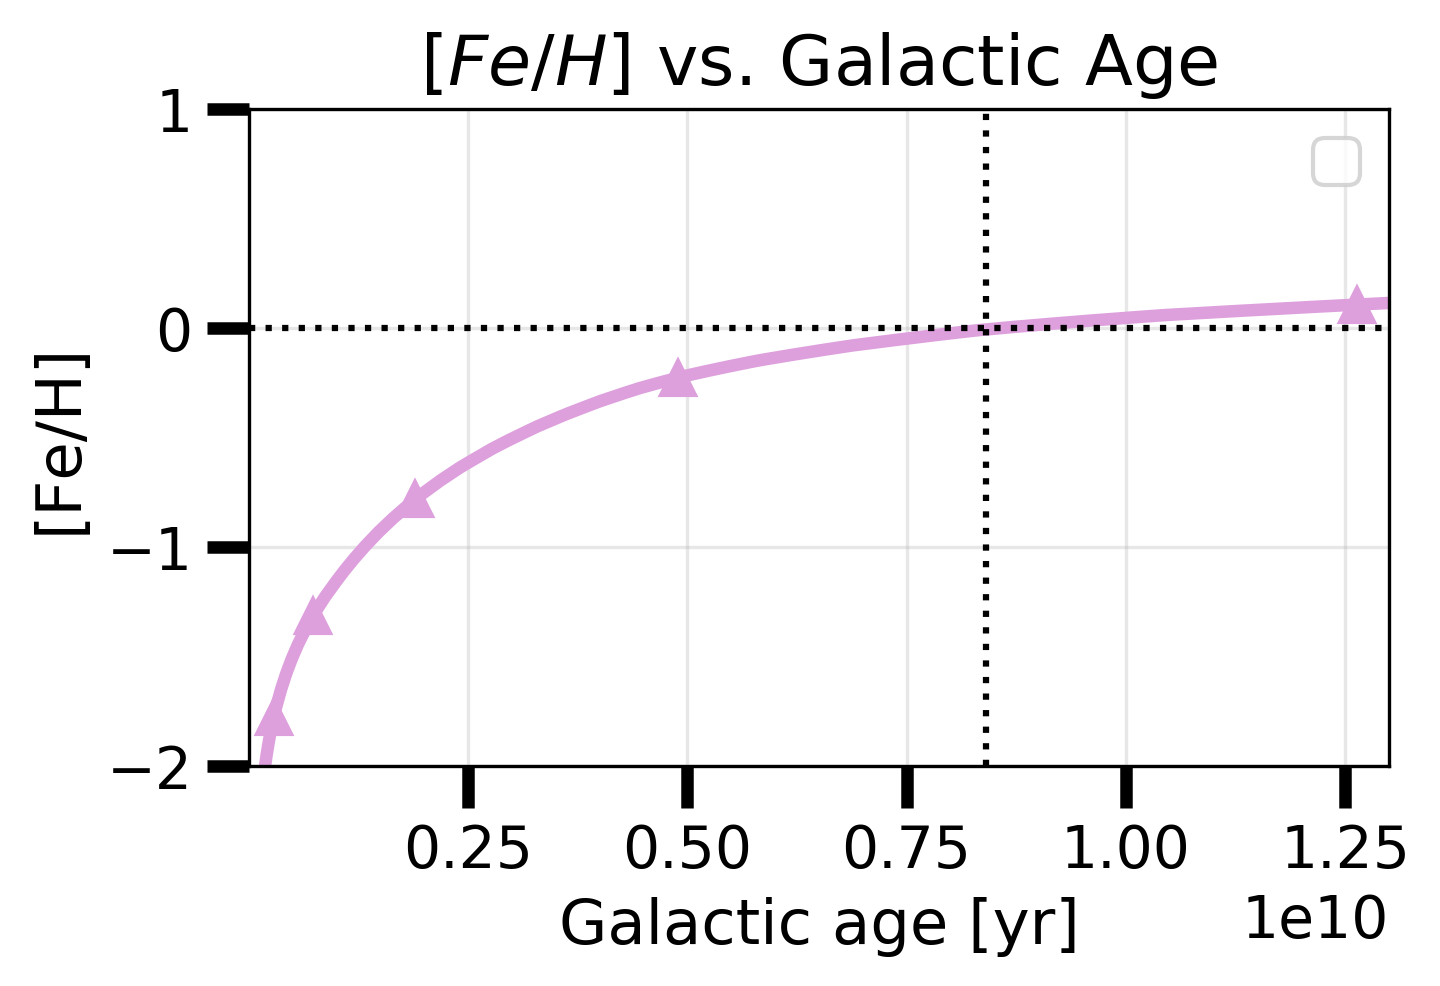

In [8]:
# Plot the evolution of [Fe/H], the iron abundance
# of the gas inside the galaxy, using the OMEGA plotting function.

ifig=8; plt.close(ifig); plt.figure(ifig, figsize=(8,3), dpi=300)

#o_1.inner.plot_spectro(fig=ifig,color='r', marker='o', label='Run 1')
o_2.inner.plot_spectro(fig=ifig,color='plum', marker='^', label='Run 2')
plt.ylim(-2,1)
plt.xscale('linear')
plt.xlabel('Galactic age [yr]')

# Plot the solar value (black dotted lines)
t_Sun = 13.0e9 - 4.6e9
plt.plot([t_Sun,t_Sun], [-2,1], ':k')
plt.plot([0,13e9], [0,0], ':k')
plt.grid(alpha=0.3)
plt.title(r'$[Fe/H]$ vs. Galactic Age')
plt.legend([])
plt.show()

The current galactic inflow rate estimated for the Milky Way is about 1 M$_\odot$ yr$^{-1}$.

**Note:** You will need to extrapolate by eye the inflow rate predictions up to 13 Gyr.

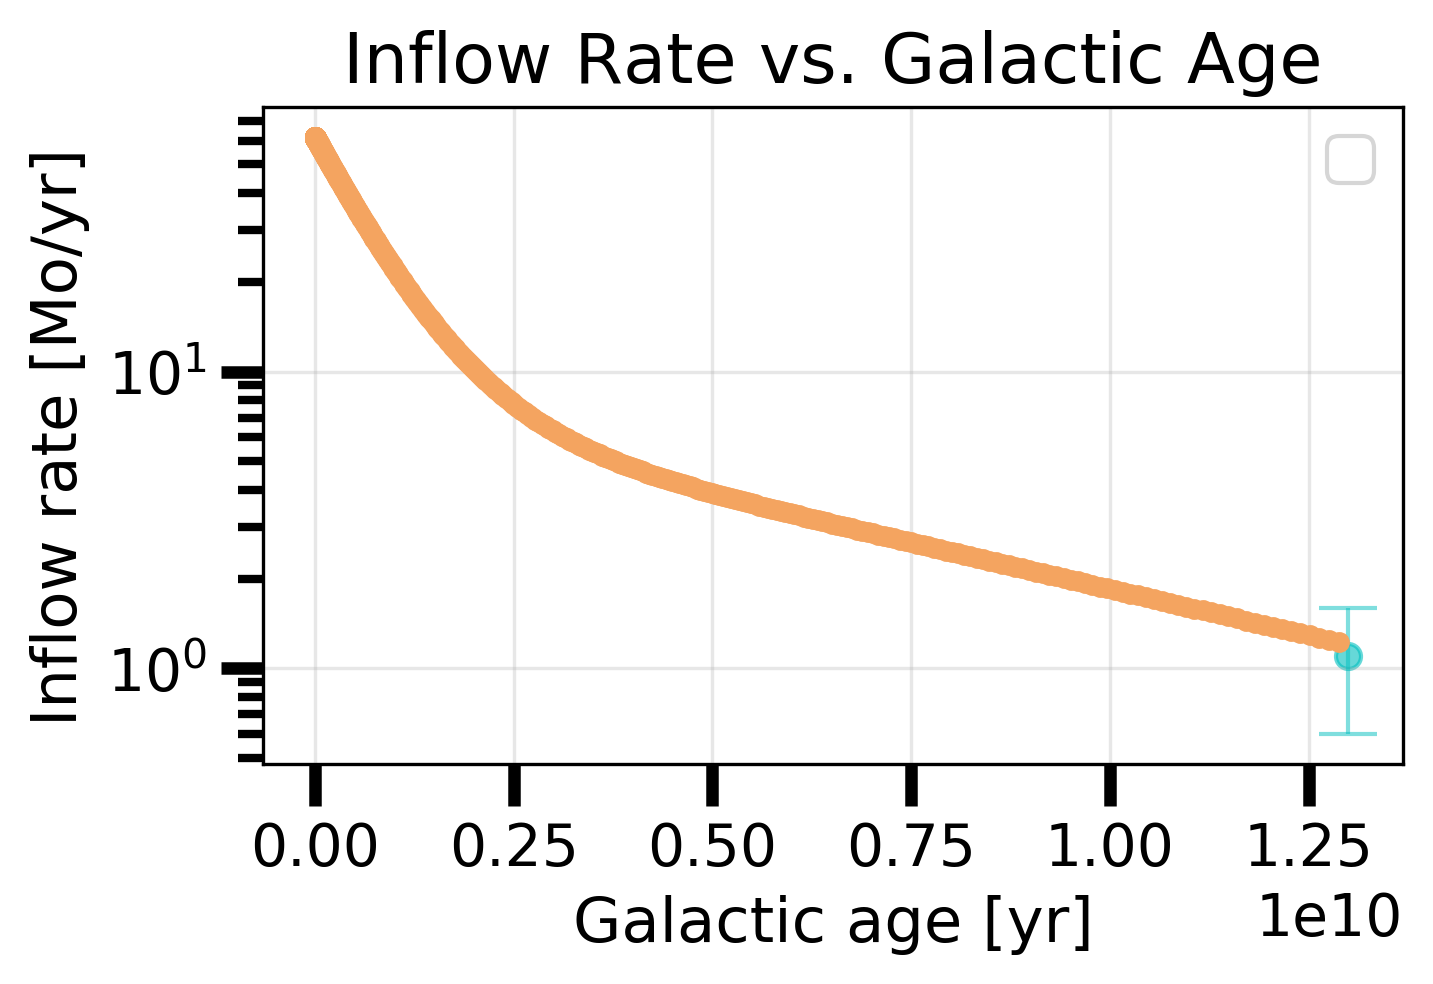

In [9]:
# Plot the evolution of the inflow rate using
# the OMEGA plotting function.
#%matplotlib nbagg
ifig=13; plt.close(ifig); plt.figure(ifig, figsize=(8,3), dpi=300)
#o_1.inner.plot_inflow_rate(fig=ifig, color='r', marker='o', label='Run 1')
o_2.inner.plot_inflow_rate(fig=ifig, color='sandybrown', marker='.', label='Run 2')
plt.yscale('log')
plt.xlabel('Galactic age [yr]')

# Plot the observational constraint (cyan color)
#plt.plot([13e9,13e9], [0.6,1.6], linewidth=6, color='c', alpha=0.5)
plt.errorbar(13e9, 1.1, yerr=[0.5], linewidth=1, color='c', alpha=0.5, capsize=7)
plt.scatter([13e9], [1.1], color='c', alpha=0.6)
plt.grid(alpha=0.3)
plt.title('Inflow Rate vs. Galactic Age')
plt.legend([])

In [10]:
# Define the input parameters constrained during Step 1
sfe = 0.013
t_star = 0.7e8
in_mag = 1.35

# Run OMEGA+ with your set of parameters (simple Milky Way model)
exp_infall = [[in_mag*40, 0.0, 0.8e9], [in_mag*5, 1.0e9, 7.0e9]]
om = omega_plus.omega_plus(sfe=sfe, t_star=t_star, exp_infall=exp_infall, \
                          special_timesteps=1000)

OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 57.63s
   OMEGA+ run completed - Run time: 57.63s


In [11]:
specie = 'Cr'

# Verify that the target specie is available
if specie in om.inner.history.elements or specie in om.inner.history.isotopes:
    print('The element/isotope is available.')
else:
    print('Error - The element/isotope IS NOT available, please select a new one.')

The element/isotope is available.


Text(0, 0.5, 'Mass of Cr')

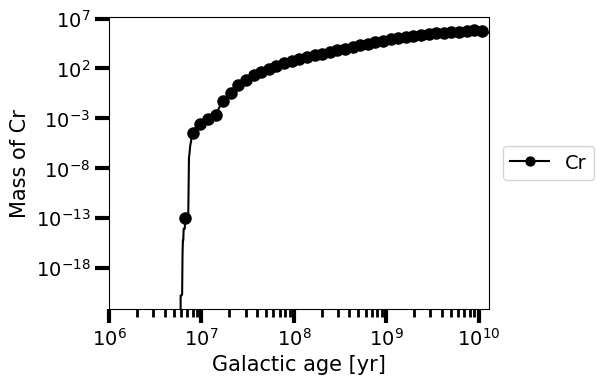

In [12]:
# plot the abundance of the desired species:
ifig = 11; plt.close(ifig); plt.figure(ifig, figsize=(8,4), dpi=100)
om.inner.plot_mass(fig=ifig,specie=specie)
plt.xlabel('Galactic age [yr]')
plt.ylabel('Mass of '+specie)
#plt.xscale('linear')
#plt.ylim(1e3,6e7)

<Figure size 1600x800 with 0 Axes>

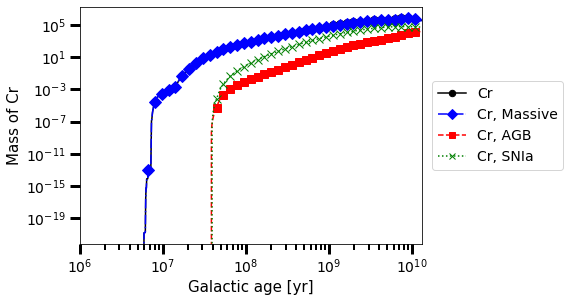

In [13]:
ifig = 12; plt.close(ifig); plt.figure(ifig, figsize=(8,4), dpi=200)

om.inner.plot_mass(specie=specie)
om.inner.plot_mass(specie=specie, source='massive')
om.inner.plot_mass(specie=specie, source='agb')
om.inner.plot_mass(specie=specie, source='sn1a')
plt.xlabel('Galactic age [yr]')
plt.ylabel('Mass of '+specie)
#plt.xscale('linear')
#plt.ylim(1e3,6e7)
plt.show()

In [14]:
age_1 = om.inner.plot_mass(specie=specie, return_x_y=True)[0]

len(np.where(age_1>(4.6e9))[0])

#print(age_1)

110

In [15]:
0.0, 0.0001, 0.001, 0.006, 0.01, 0.02

(0.0, 0.0001, 0.001, 0.006, 0.01, 0.02)

In [16]:
s_0_0     = sygma.sygma(iniZ=0.0,)
s_0_01    = sygma.sygma(iniZ=0.01,)
s_0_02    = sygma.sygma(iniZ=0.02,)
s_0_001   = sygma.sygma(iniZ=0.001,)
s_0_006   = sygma.sygma(iniZ=0.006,)
s_0_0001  = sygma.sygma(iniZ=0.0001)

SYGMA run in progress..
   SYGMA run completed - Run time: 0.04s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.04s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.05s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.04s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.04s
SYGMA run in progress..
   SYGMA run completed - Run time: 0.04s


In [17]:
specie = 'Cr'

# Verify that the target specie is available
if specie in s_0_01.history.elements or specie in o.inner.history.isotopes:
    print('The element/isotope is available.')
else:
    print('Error - The element/isotope IS NOT available, please select a new one.')

The element/isotope is available.


Text(0.5, 1.0, 'Production of Cr in GCE Model')

<Figure size 2400x900 with 0 Axes>

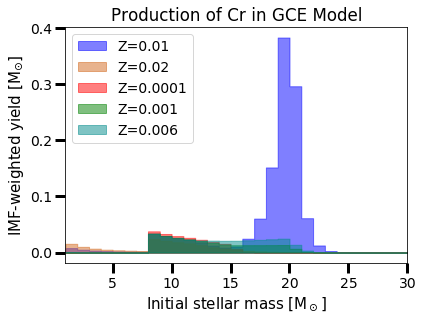

In [18]:
ifig = 12; plt.close(ifig); plt.figure(ifig, figsize=(8,3), dpi=300)

s_0_01.plot_mass_range_contributions( specie=specie, color='b', label='Z=0.01', histtype='stepfilled')
s_0_02.plot_mass_range_contributions( specie=specie, color='chocolate', label='Z=0.02', histtype='stepfilled')
s_0_0001.plot_mass_range_contributions(specie=specie, color='r', label='Z=0.0001')
s_0_001.plot_mass_range_contributions(specie=specie, color='g', label='Z=0.001')
#s_0_0.plot_mass_range_contributions( specie=specie, color='r', label='Z=0.0', histtype='stepfilled')
s_0_006.plot_mass_range_contributions(specie=specie, color='darkcyan', label='Z=0.006')

plt.legend(loc='upper left')
plt.xlabel('Initial stellar mass [M$_\odot$]')
plt.title('Production of '+specie +' in GCE Model')

<Figure size 2400x900 with 0 Axes>

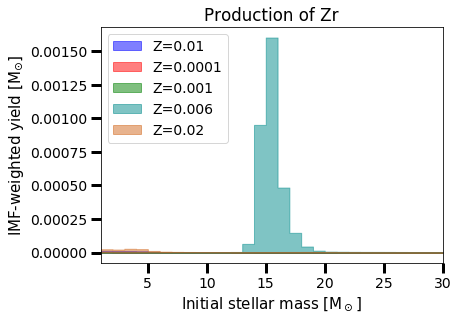

In [19]:
ifig = 12; plt.close(ifig); plt.figure(ifig, figsize=(8,3), dpi=300)

s_0_01.plot_mass_range_contributions(  specie='Zr', color='b', label='Z=0.01', histtype='stepfilled')
s_0_0001.plot_mass_range_contributions(specie='Zr', color='r', label='Z=0.0001')
s_0_001.plot_mass_range_contributions( specie='Zr', color='g', label='Z=0.001')
s_0_006.plot_mass_range_contributions( specie='Zr', color='darkcyan', label='Z=0.006')
s_0_02.plot_mass_range_contributions( specie= 'Zr', color='chocolate', label='Z=0.02', histtype='stepfilled')




plt.xlabel('Initial stellar mass [M$_\odot$]')
plt.title('Production of '+'Zr')
plt.legend(loc='upper left')

<Figure size 2400x900 with 0 Axes>

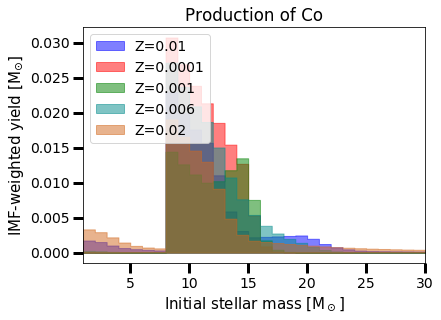

In [20]:
ifig = 12; plt.close(ifig); plt.figure(ifig, figsize=(8,3), dpi=300)

s_0_01.plot_mass_range_contributions(  specie='Co', color='b', label='Z=0.01', histtype='stepfilled')
s_0_0001.plot_mass_range_contributions(specie='Co', color='r', label='Z=0.0001')
s_0_001.plot_mass_range_contributions( specie='Co', color='g', label='Z=0.001')
s_0_006.plot_mass_range_contributions( specie='Co', color='darkcyan', label='Z=0.006')
s_0_02.plot_mass_range_contributions( specie= 'Co', color='chocolate', label='Z=0.02', histtype='stepfilled')



plt.xlabel('Initial stellar mass [M$_\odot$]')
plt.title('Production of '+'Co')
plt.legend(loc='upper left')

<Figure size 2400x900 with 0 Axes>

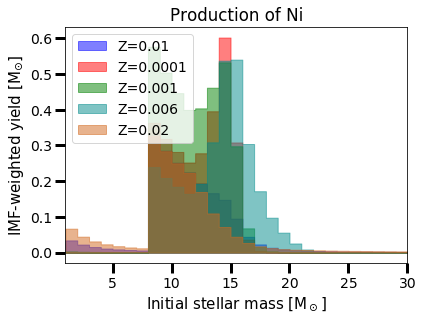

In [21]:
ifig = 12; plt.close(ifig); plt.figure(ifig, figsize=(8,3), dpi=300)

s_0_01.plot_mass_range_contributions(  specie='Ni', color='b', label='Z=0.01', histtype='stepfilled')
s_0_0001.plot_mass_range_contributions(specie='Ni', color='r', label='Z=0.0001')
s_0_001.plot_mass_range_contributions( specie='Ni', color='g', label='Z=0.001')
s_0_006.plot_mass_range_contributions( specie='Ni', color='darkcyan', label='Z=0.006')
s_0_02.plot_mass_range_contributions( specie= 'Ni', color='chocolate', label='Z=0.02', histtype='stepfilled')



plt.xlabel('Initial stellar mass [M$_\odot$]')
plt.title('Production of '+'Ni')
plt.legend(loc='upper left')

<Figure size 2400x900 with 0 Axes>

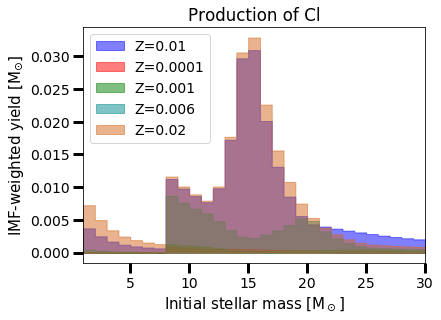

In [55]:
ifig = 12; plt.close(ifig); plt.figure(ifig, figsize=(8,3), dpi=300)

s_0_01.plot_mass_range_contributions(  specie='Cl', color='b', label='Z=0.01', histtype='stepfilled')
s_0_0001.plot_mass_range_contributions(specie='Cl', color='r', label='Z=0.0001')
s_0_001.plot_mass_range_contributions( specie='Cl', color='g', label='Z=0.001')
s_0_006.plot_mass_range_contributions( specie='Cl', color='darkcyan', label='Z=0.006')
s_0_02.plot_mass_range_contributions( specie= 'Cl', color='chocolate', label='Z=0.02', histtype='stepfilled')



plt.xlabel('Initial stellar mass [M$_\odot$]')
plt.title('Production of '+'Cl')
plt.legend(loc='upper left')

In [23]:
# Create a list of reference papers
obs = ['stellab_data/milky_way_data/Cohen_et_al_2013_stellab',\
       'stellab_data/milky_way_data/Jacobson_et_al_2015_stellab',\
       'stellab_data/milky_way_data/Venn_et_al_2004_stellab',\
       'stellab_data/milky_way_data/Bensby_et_al_2014_stellab',\
       'stellab_data/milky_way_data/Nissen_et_al_2014_stellab',\
       'stellab_data/milky_way_data/Battistini_Bensby_2015_stellab',\
       'stellab_data/milky_way_data/Battistini_Bensby_2016_stellab']

# Create a list of reference papers
obs2 = ['stellab_data/milky_way_data/Jacobson_et_al_2015_stellab',\
       'stellab_data/milky_way_data/Venn_et_al_2004_stellab']



In [24]:
obs3 = ['stellab_data/milky_way_data/Frebel_2010_Milky_Way_stellab',
        'stellab_data/milky_way_data/Venn_et_al_2004_stellab',
        'stellab_data/milky_way_data/Akerman_et_al_2004_stellab',
        'stellab_data/milky_way_data/Andrievsky_et_al_2007_stellab',
        'stellab_data/milky_way_data/Andrievsky_et_al_2008_stellab',
        'stellab_data/milky_way_data/Andrievsky_et_al_2010_stellab',
        'stellab_data/milky_way_data/Bensby_et_al_2005_stellab',
        'stellab_data/milky_way_data/Bihain_et_al_2004_stellab',
        'stellab_data/milky_way_data/Bonifacio_et_al_2009_stellab',
        'stellab_data/milky_way_data/Caffau_et_al_2005_stellab',
        'stellab_data/milky_way_data/Cayrel_et_al_2004_stellab',
        'stellab_data/milky_way_data/Fabbian_et_al_2009_stellab',
        'stellab_data/milky_way_data/Gratton_et_al_2003_stellab',
        'stellab_data/milky_way_data/Israelian_et_al_2004_stellab',
        'stellab_data/milky_way_data/Lai_et_al_2008_stellab',
        'stellab_data/milky_way_data/Nissen_et_al_2007_stellab',
        'stellab_data/milky_way_data/Reddy_et_al_2006_stellab',
        'stellab_data/milky_way_data/Reddy_et_al_2003_stellab',
        'stellab_data/milky_way_data/Spite_et_al_2005_stellab',
        'stellab_data/milky_way_data/Battistini_Bensby_2016_stellab',
        'stellab_data/milky_way_data/Nissen_et_al_2014_stellab',
        'stellab_data/milky_way_data/Ramirez_et_al_2013_stellab',
        'stellab_data/milky_way_data/Bensby_et_al_2014_stellab',
        'stellab_data/milky_way_data/Battistini_Bensby_2015_stellab',
        'stellab_data/milky_way_data/Yong_et_al_2013_stellab',
        'stellab_data/milky_way_data/Jacobson_et_al_2015_stellab',
        'stellab_data/milky_way_data/Cohen_et_al_2013_stellab',
        'stellab_data/milky_way_data/Cohen_et_al_2013_noCEMPs_stellab',
        'stellab_data/milky_way_data/Adibekyan_et_al_2012_stellab',
        'stellab_data/milky_way_data/Aoki_Honda_2008_stellab',
        'stellab_data/milky_way_data/Hansen_et_al_2012_pecu_excluded_stellab',
        'stellab_data/milky_way_data/Ishigaki_et_al_2012_2013_stellab',
        'stellab_data/milky_way_data/Roederer_et_al_2009_stellab',
        'stellab_data/milky_way_data/Roederer_et_al_2014_pecu_excluded_stellab']

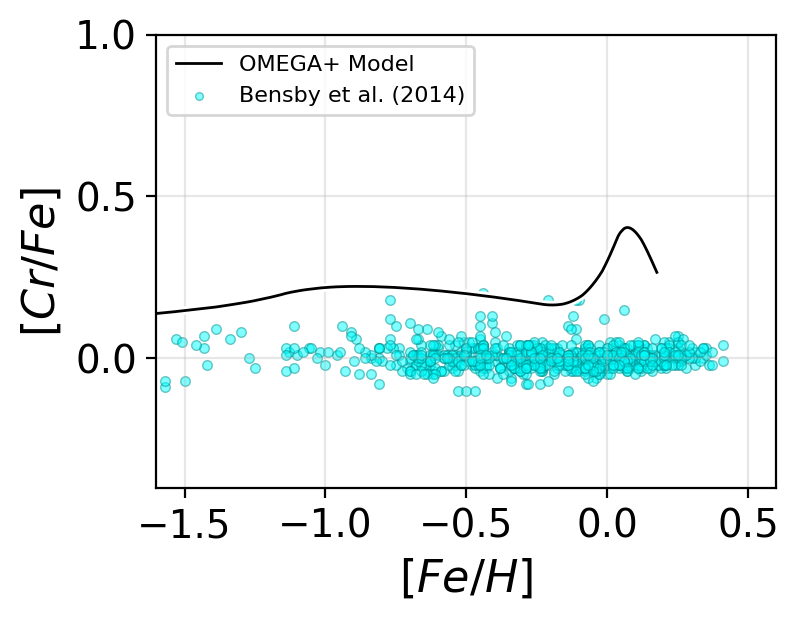

In [25]:
ifig=14; plt.close(ifig); plt.figure(ifig, figsize=(4,3), dpi=200)

obs_xy = sl.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Cr/Fe]', obs=[obs[3]],return_xy=True, norm='Asplund_et_al_2009')

plt.scatter(obs_xy[0], obs_xy[1], s=12,marker='o', edgecolor='darkcyan', linewidth=0.5,color='cyan', alpha=0.5, label='Bensby et al. (2014)')


# Extract the numerical prediction of OMEGA+ using the "return_x_y" argument.
xy_o = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Cr/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

# Overplot your chemical evolution predictions on top of observations.
# Here I plot a thicker white line behind the black line to improve its
# visibility when the line goes through many data points.
plt.plot(xy_o[0], xy_o[1], color='w', linewidth=3.0)
plt.plot(xy_o[0], xy_o[1], color='k', linewidth=1, label='OMEGA+ Model')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='upper left', markerscale=0.8, fontsize=8)
plt.xlim(-1.6,0.6)
plt.ylim(-0.4,1.)
plt.xlabel(r'$[Fe/H]$', fontsize=16)
plt.ylabel(r'$[Cr/Fe]$', fontsize=16)

plt.grid(alpha=0.3)
#plt.tight_layout()

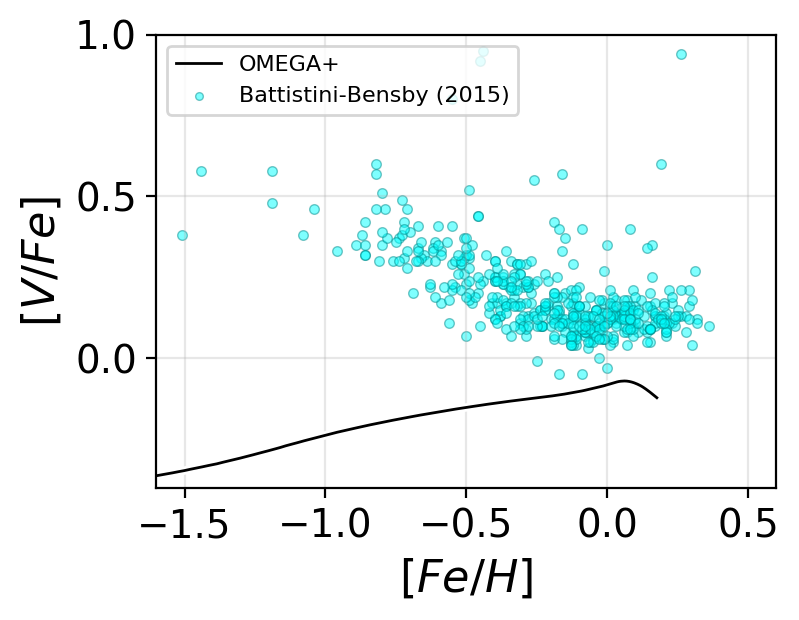

In [26]:
ifig=14; plt.close(ifig); plt.figure(ifig, figsize=(4,3), dpi=200)

obs_xy = sl.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[V/Fe]', obs=[obs[5]],return_xy=True, norm='Asplund_et_al_2009')

plt.scatter(obs_xy[0], obs_xy[1], s=12,marker='o', edgecolor='darkcyan', linewidth=0.5,color='cyan', alpha=0.5, label='Battistini-Bensby (2015)')

# Extract the numerical prediction of OMEGA+ using the "return_x_y" argument.
xy_o = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[V/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

# Overplot your chemical evolution predictions on top of observations.
# Here I plot a thicker white line behind the black line to improve its
# visibility when the line goes through many data points.
plt.plot(xy_o[0], xy_o[1], color='w', linewidth=3.0)
plt.plot(xy_o[0], xy_o[1], color='k', linewidth=1, label='OMEGA+')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='upper left', markerscale=0.8, fontsize=8)
plt.xlim(-1.6,0.6)
plt.ylim(-0.4,1.)
plt.xlabel(r'$[Fe/H]$', fontsize=16)
plt.ylabel(r'$[V/Fe]$', fontsize=16)

plt.grid(alpha=0.3)
#plt.tight_layout()

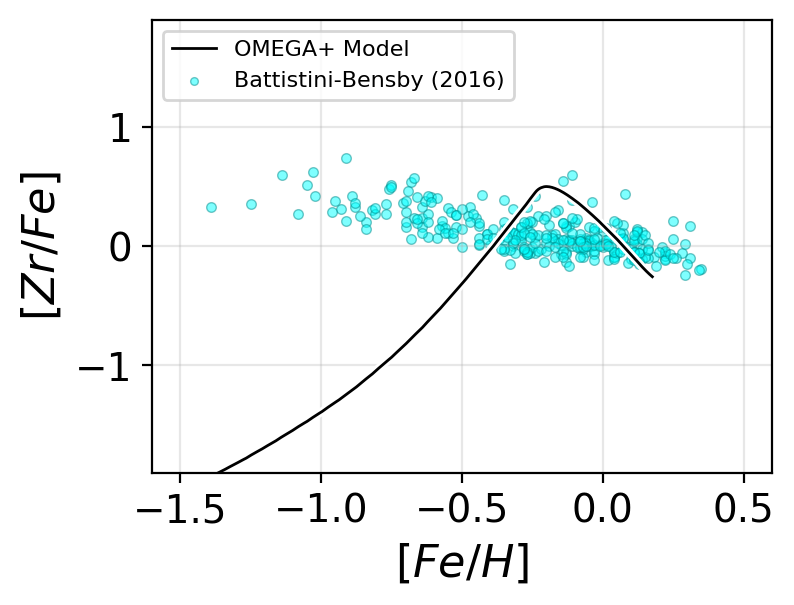

In [27]:
ifig=24; plt.close(ifig); plt.figure(ifig, figsize=(4,3), dpi=200)

obs_xy = sl.plot_spectro(fig=4,xaxis='[Fe/H]',obs=[obs[6]], yaxis='[Zr/Fe]',return_xy=True, norm='Asplund_et_al_2009')

plt.scatter(obs_xy[0], obs_xy[1], s=12,marker='o', edgecolor='darkcyan', linewidth=0.5,color='cyan', alpha=0.5, label='Battistini-Bensby (2016)')


# Extract the numerical prediction of OMEGA+ using the "return_x_y" argument.
xy_o = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Zr/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

# Overplot your chemical evolution predictions on top of observations.
# Here I plot a thicker white line behind the black line to improve its
# visibility when the line goes through many data points.
plt.plot(xy_o[0], xy_o[1], color='w', linewidth=3.0)
plt.plot(xy_o[0], xy_o[1], color='k', linewidth=1, label='OMEGA+ Model')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='upper left', markerscale=0.8, fontsize=8)
plt.xlim(-1.6,.6)
plt.ylim(-1.9,1.9)
plt.xlabel(r'$[Fe/H]$', fontsize=16)
plt.ylabel(r'$[Zr/Fe]$', fontsize=16)

plt.grid(alpha=0.3)
#plt.tight_layout()

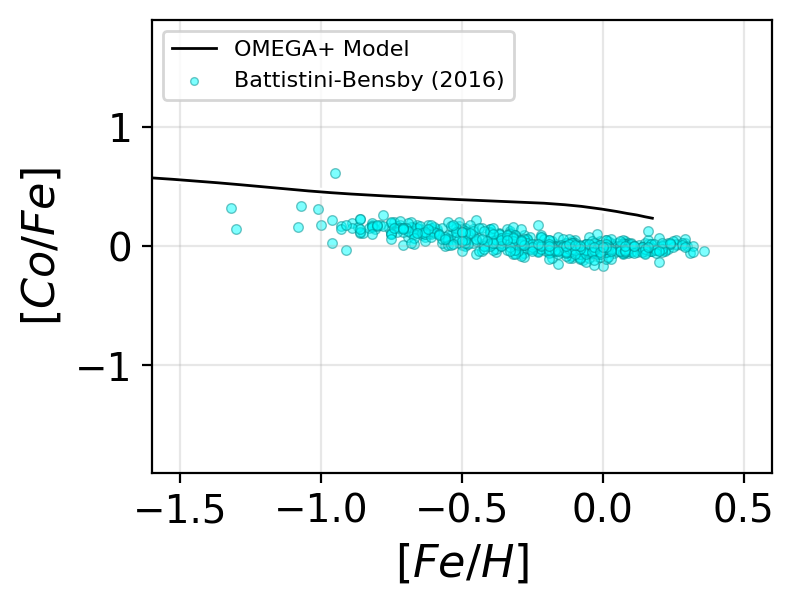

In [28]:
ifig=24; plt.close(ifig); plt.figure(ifig, figsize=(4,3), dpi=200)

obs_xy = sl.plot_spectro(fig=4,xaxis='[Fe/H]',obs=[obs[5]], yaxis='[Co/Fe]',return_xy=True, norm='Asplund_et_al_2009')

plt.scatter(obs_xy[0], obs_xy[1], s=12,marker='o', edgecolor='darkcyan', linewidth=0.5,color='cyan', alpha=0.5, label='Battistini-Bensby (2016)')


# Extract the numerical prediction of OMEGA+ using the "return_x_y" argument.
xy_o = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Co/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

# Overplot your chemical evolution predictions on top of observations.
# Here I plot a thicker white line behind the black line to improve its
# visibility when the line goes through many data points.
plt.plot(xy_o[0], xy_o[1], color='w', linewidth=3.0)
plt.plot(xy_o[0], xy_o[1], color='k', linewidth=1, label='OMEGA+ Model')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='upper left', markerscale=0.8, fontsize=8)
plt.xlim(-1.6,.6)
plt.ylim(-1.9,1.9)
plt.xlabel(r'$[Fe/H]$', fontsize=16)
plt.ylabel(r'$[Co/Fe]$', fontsize=16)

plt.grid(alpha=0.3)
#plt.tight_layout()

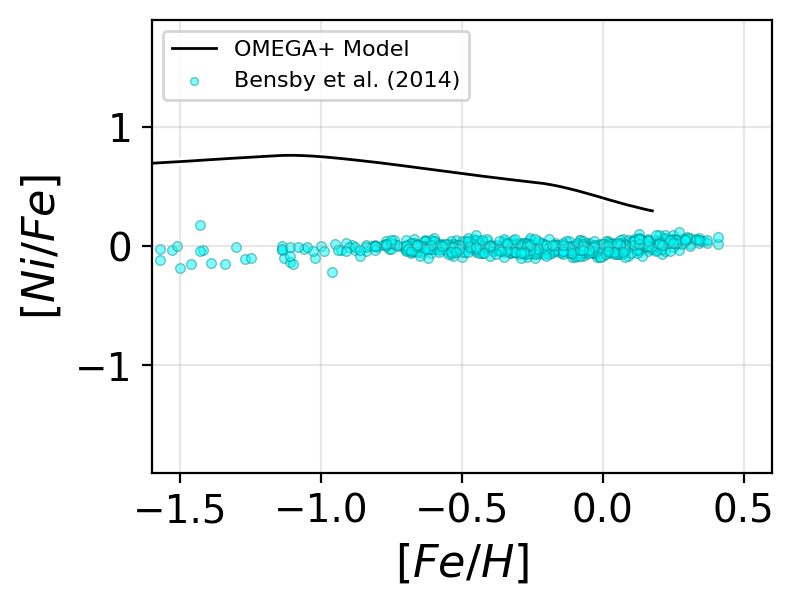

In [29]:
ifig=24; plt.close(ifig); plt.figure(ifig, figsize=(4,3), dpi=200)

obs_xy = sl.plot_spectro(fig=4,xaxis='[Fe/H]',obs=[obs[3]], yaxis='[Ni/Fe]',return_xy=True, norm='Asplund_et_al_2009')

plt.scatter(obs_xy[0], obs_xy[1], s=12,marker='o', edgecolor='darkcyan', linewidth=0.5,color='cyan', alpha=0.5, label='Bensby et al. (2014)')


# Extract the numerical prediction of OMEGA+ using the "return_x_y" argument.
xy_o = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Ni/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

# Overplot your chemical evolution predictions on top of observations.
# Here I plot a thicker white line behind the black line to improve its
# visibility when the line goes through many data points.
plt.plot(xy_o[0], xy_o[1], color='w', linewidth=3.0)
plt.plot(xy_o[0], xy_o[1], color='k', linewidth=1, label='OMEGA+ Model')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='upper left', markerscale=0.8, fontsize=8)
plt.xlim(-1.6,.6)
plt.ylim(-1.9,1.9)
plt.xlabel(r'$[Fe/H]$', fontsize=16)
plt.ylabel(r'$[Ni/Fe]$', fontsize=16)

plt.grid(alpha=0.3)
#plt.tight_layout()

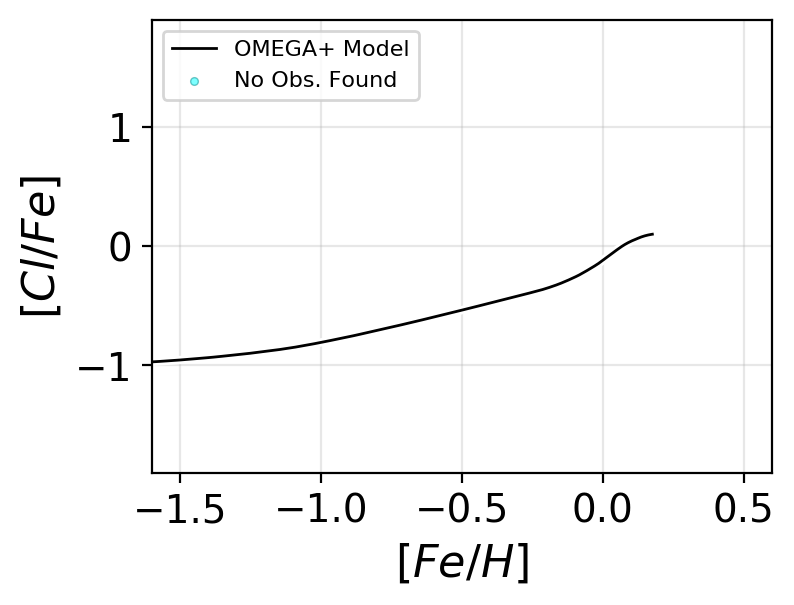

In [30]:
ifig=24; plt.close(ifig); plt.figure(ifig, figsize=(4,3), dpi=200)

obs_xy = sl.plot_spectro(fig=4,xaxis='[Fe/H]',obs=[obs3[0]], yaxis='[Cl/Fe]',return_xy=True, norm='Asplund_et_al_2009')

plt.scatter(obs_xy[0], obs_xy[1], s=12,marker='o', edgecolor='darkcyan', linewidth=0.5,color='cyan', alpha=0.5, label='No Obs. Found')


# Extract the numerical prediction of OMEGA+ using the "return_x_y" argument.
xy_o = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Cl/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

# Overplot your chemical evolution predictions on top of observations.
# Here I plot a thicker white line behind the black line to improve its
# visibility when the line goes through many data points.
plt.plot(xy_o[0], xy_o[1], color='w', linewidth=3.0)
plt.plot(xy_o[0], xy_o[1], color='k', linewidth=1, label='OMEGA+ Model')

# Update the legend and set the X and Y axis limits.
plt.legend(loc='upper left', markerscale=0.8, fontsize=8)
plt.xlim(-1.6,.6)
plt.ylim(-1.9,1.9)
plt.xlabel(r'$[Fe/H]$', fontsize=16)
plt.ylabel(r'$[Cl/Fe]$', fontsize=16)

plt.grid(alpha=0.3)
#plt.tight_layout()

In [31]:
obs_cr = sl.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Cr/Fe]', obs=[obs[3]],return_xy=True, norm='Asplund_et_al_2009')

xy_cr = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Cr/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

obs_zr = sl.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Zr/Fe]', obs=[obs[6]],return_xy=True, norm='Asplund_et_al_2009')

xy_zr = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Zr/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

obs_co = sl.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Co/Fe]', obs=[obs[5]],return_xy=True, norm='Asplund_et_al_2009')

xy_co = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Co/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

obs_ni = sl.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Ni/Fe]', obs=[obs[3]],return_xy=True, norm='Asplund_et_al_2009')

xy_ni = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Ni/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

obs_cl = sl.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Cl/Fe]', obs=[obs[3]],return_xy=True, norm='Asplund_et_al_2009')

xy_cl = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[Cl/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

obs_v = sl.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[V/Fe]', obs=[obs[5]],return_xy=True, norm='Asplund_et_al_2009')

xy_v = om.inner.plot_spectro(fig=4,xaxis='[Fe/H]', yaxis='[V/Fe]', \
                            return_x_y=True, solar_norm='Asplund_et_al_2009')

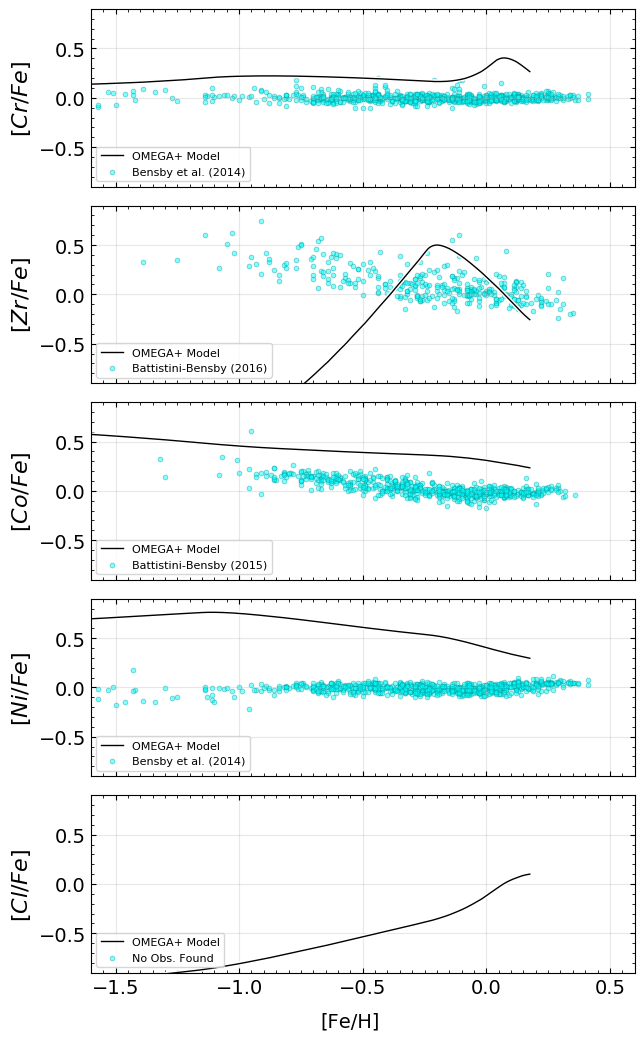

In [32]:
# plots the data:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# style:

ff, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1, sharex=True, dpi=100)
ff.set_figwidth(6)
ff.set_figheight(10)
ff.tight_layout(pad=0)

# plots:

# cr:
ax1.scatter(obs_cr[0], obs_cr[1], s=12,marker='o', edgecolor='darkcyan', linewidth=0.5,color='cyan', alpha=0.5, label='Bensby et al. (2014)')
ax1.plot(xy_cr[0], xy_cr[1], color='w', linewidth=3.0)
ax1.plot(xy_cr[0], xy_cr[1], color='k', linewidth=1, label='OMEGA+ Model')
ax1.set_xlim(-1.6,0.6)
ax1.set_ylim(-0.9,0.9)
ax1.set_ylabel(r'$[Cr/Fe]$', fontsize=16)

ax2.scatter(obs_zr[0], obs_zr[1], s=12,marker='o', edgecolor='darkcyan', linewidth=0.5,color='cyan', alpha=0.5, label='Battistini-Bensby (2016)')
ax2.plot(xy_zr[0], xy_zr[1], color='w', linewidth=3.0)
ax2.plot(xy_zr[0], xy_zr[1], color='k', linewidth=1, label='OMEGA+ Model')
ax2.set_xlim(-1.6,0.6)
ax2.set_ylim(-0.9,0.9)
ax2.set_ylabel(r'$[Zr/Fe]$', fontsize=16)

ax3.scatter(obs_co[0], obs_co[1], s=12,marker='o', edgecolor='darkcyan', linewidth=0.5,color='cyan', alpha=0.5, label='Battistini-Bensby (2015)')
ax3.plot(xy_co[0], xy_co[1], color='w', linewidth=3.0)
ax3.plot(xy_co[0], xy_co[1], color='k', linewidth=1, label='OMEGA+ Model')
ax3.set_xlim(-1.6,0.6)
ax3.set_ylim(-0.9,0.9)
ax3.set_ylabel(r'$[Co/Fe]$', fontsize=16)

ax4.scatter(obs_ni[0], obs_ni[1], s=12,marker='o', edgecolor='darkcyan', linewidth=0.5,color='cyan', alpha=0.5, label='Bensby et al. (2014)')
ax4.plot(xy_ni[0], xy_ni[1], color='w', linewidth=3.0)
ax4.plot(xy_ni[0], xy_ni[1], color='k', linewidth=1, label='OMEGA+ Model')
ax4.set_xlim(-1.6,0.6)
ax4.set_ylim(-0.9,0.9)
ax4.set_ylabel(r'$[Ni/Fe]$', fontsize=16)

ax5.scatter(obs_cl[0], obs_cl[1], s=12,marker='o', edgecolor='darkcyan', linewidth=0.5,color='cyan', alpha=0.5, label='No Obs. Found')
ax5.plot(xy_cl[0], xy_cl[1], color='w', linewidth=3.0)
ax5.plot(xy_cl[0], xy_cl[1], color='k', linewidth=1, label='OMEGA+ Model')
ax5.set_xlim(-1.6,0.6)
ax5.set_ylim(-0.9,0.9)
ax5.set_ylabel(r'$[Cl/Fe]$', fontsize=16)


ax1.legend(loc='lower left',prop={'size': 8})
ax2.legend(loc='lower left',prop={'size': 8})
ax3.legend(loc='lower left',prop={'size': 8})
ax4.legend(loc='lower left',prop={'size': 8})
ax5.legend(loc='lower left',prop={'size': 8})



ax1.grid(True, alpha=0.3)
ax2.grid(True, alpha=0.3)
ax3.grid(True, alpha=0.3)
ax4.grid(True, alpha=0.3)
ax5.grid(True, alpha=0.3)



#ff.suptitle('Counts as a function of Voltage for Each Detector')
#ff.supxlabel('Voltage, [kV]')
ff.text(0.5, -0.02, '[Fe/H]', ha='center', va='center')

ax1.xaxis.set_major_locator(MultipleLocator(0.2))
ax1.xaxis.set_minor_locator(MultipleLocator(0.04))
ax1.yaxis.set_major_locator(MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(MultipleLocator(0.1))
ax1.tick_params(axis='both', direction="in")
ax1.tick_params(which="minor", axis="x", direction="in")
ax1.tick_params(which="minor", axis="y", direction="in")
ax1.xaxis.set_ticks_position('both') 
ax1.yaxis.set_ticks_position('both')

ax2.xaxis.set_major_locator(MultipleLocator(0.2))
ax2.xaxis.set_minor_locator(MultipleLocator(0.04))
ax2.yaxis.set_major_locator(MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(MultipleLocator(0.1))
ax2.tick_params(axis='both', direction="in")
ax2.tick_params(which="minor", axis="x", direction="in")
ax2.tick_params(which="minor", axis="y", direction="in")
ax2.xaxis.set_ticks_position('both') 
ax2.yaxis.set_ticks_position('both')

ax3.xaxis.set_major_locator(MultipleLocator(0.2))
ax3.xaxis.set_minor_locator(MultipleLocator(0.04))
ax3.yaxis.set_major_locator(MultipleLocator(0.5))
ax3.yaxis.set_minor_locator(MultipleLocator(0.1))
ax3.tick_params(axis='both', direction="in")
ax3.tick_params(which="minor", axis="x", direction="in")
ax3.tick_params(which="minor", axis="y", direction="in")
ax3.xaxis.set_ticks_position('both') 
ax3.yaxis.set_ticks_position('both')

ax4.xaxis.set_major_locator(MultipleLocator(0.5))
ax4.xaxis.set_minor_locator(MultipleLocator(0.1))
ax4.yaxis.set_major_locator(MultipleLocator(0.5))
ax4.yaxis.set_minor_locator(MultipleLocator(0.1))
ax4.tick_params(axis='both', direction="in")
ax4.tick_params(which="minor", axis="x", direction="in")
ax4.tick_params(which="minor", axis="y", direction="in")
ax4.xaxis.set_ticks_position('both') 
ax4.yaxis.set_ticks_position('both')

ax5.xaxis.set_major_locator(MultipleLocator(0.5))
ax5.xaxis.set_minor_locator(MultipleLocator(0.05))
ax5.yaxis.set_major_locator(MultipleLocator(0.5))
ax5.yaxis.set_minor_locator(MultipleLocator(0.1))
ax5.tick_params(axis='both', direction="in")
ax5.tick_params(which="minor", axis="x", direction="in")
ax5.tick_params(which="minor", axis="y", direction="in")
ax5.xaxis.set_ticks_position('both') 
ax5.yaxis.set_ticks_position('both')

#plt.savefig('/home/user/benfredebo_config/Final Project/abundances.png', dpi=300,bbox_inches='tight')

In [33]:
%pwd

'/home/user/benfredebo_config/Final Project'

In [34]:
# Define the input parameters constrained during Step 1.
sfe = 0.013
t_star = 0.7e8
in_mag = 1.35

# Number of Type Ia supernova per units of stellar mass formed.
# You will adjust this number in Exercise 1.
nb_1a_per_m = 0.0003

# Number of neutron star mergers per units of stellar mass formed.
# You will adjust this number in Exercise 3.
nb_nsm_per_m = 2.5e-5

# Run OMEGA+ with your set of parameters (simple Milky Way model).
exp_infall = [[in_mag*40, 0.0, 0.8e9], [in_mag*5, 1.0e9, 7.0e9]]
r_process_yields = 'yield_tables/r_process_arnould_2007.txt'
om_new = omega_plus.omega_plus(sfe=sfe, t_star=t_star, exp_infall=exp_infall, \
                          special_timesteps=1000, table=table, nb_1a_per_m=nb_1a_per_m,\
                          ns_merger_on=True, nb_nsm_per_m=nb_nsm_per_m,
                          t_nsm_coal=1.0e8, nsmerger_table=r_process_yields)


OMEGA+ run in progress..
OMEGA run in progress..
   OMEGA run completed - Run time: 64.45s
   OMEGA+ run completed - Run time: 64.45s


In [35]:
age_new = om_new.inner.plot_mass(specie=specie, return_x_y=True)[0]
age_1 = om.inner.plot_mass(specie=specie, return_x_y=True)[0]

len(np.where(age_new>(4.6e9))[0])
len(np.where(age_1>(4.6e9))[0])



110

In [36]:
1000-110

890

In [37]:
# Timestep index where the Sun should aproximately form.
# The index is only valid with "special_timesteps=120".
# Do not modify.
i_t_Sun = 958

# Get source contributions (this needs to be right after running OMEGA+)
# m_el_all, m_el_agb, m_el_massive, m_el_sn1a, m_el_nsm = \
#     get_individual_sources(om_new.inner, i_step_sol=i_t_Sun)

m_el_all, m_el_agb, m_el_massive, m_el_sn1a, m_el_nsm = \
     get_individual_sources(om_new.inner, i_step_sol=i_t_Sun)

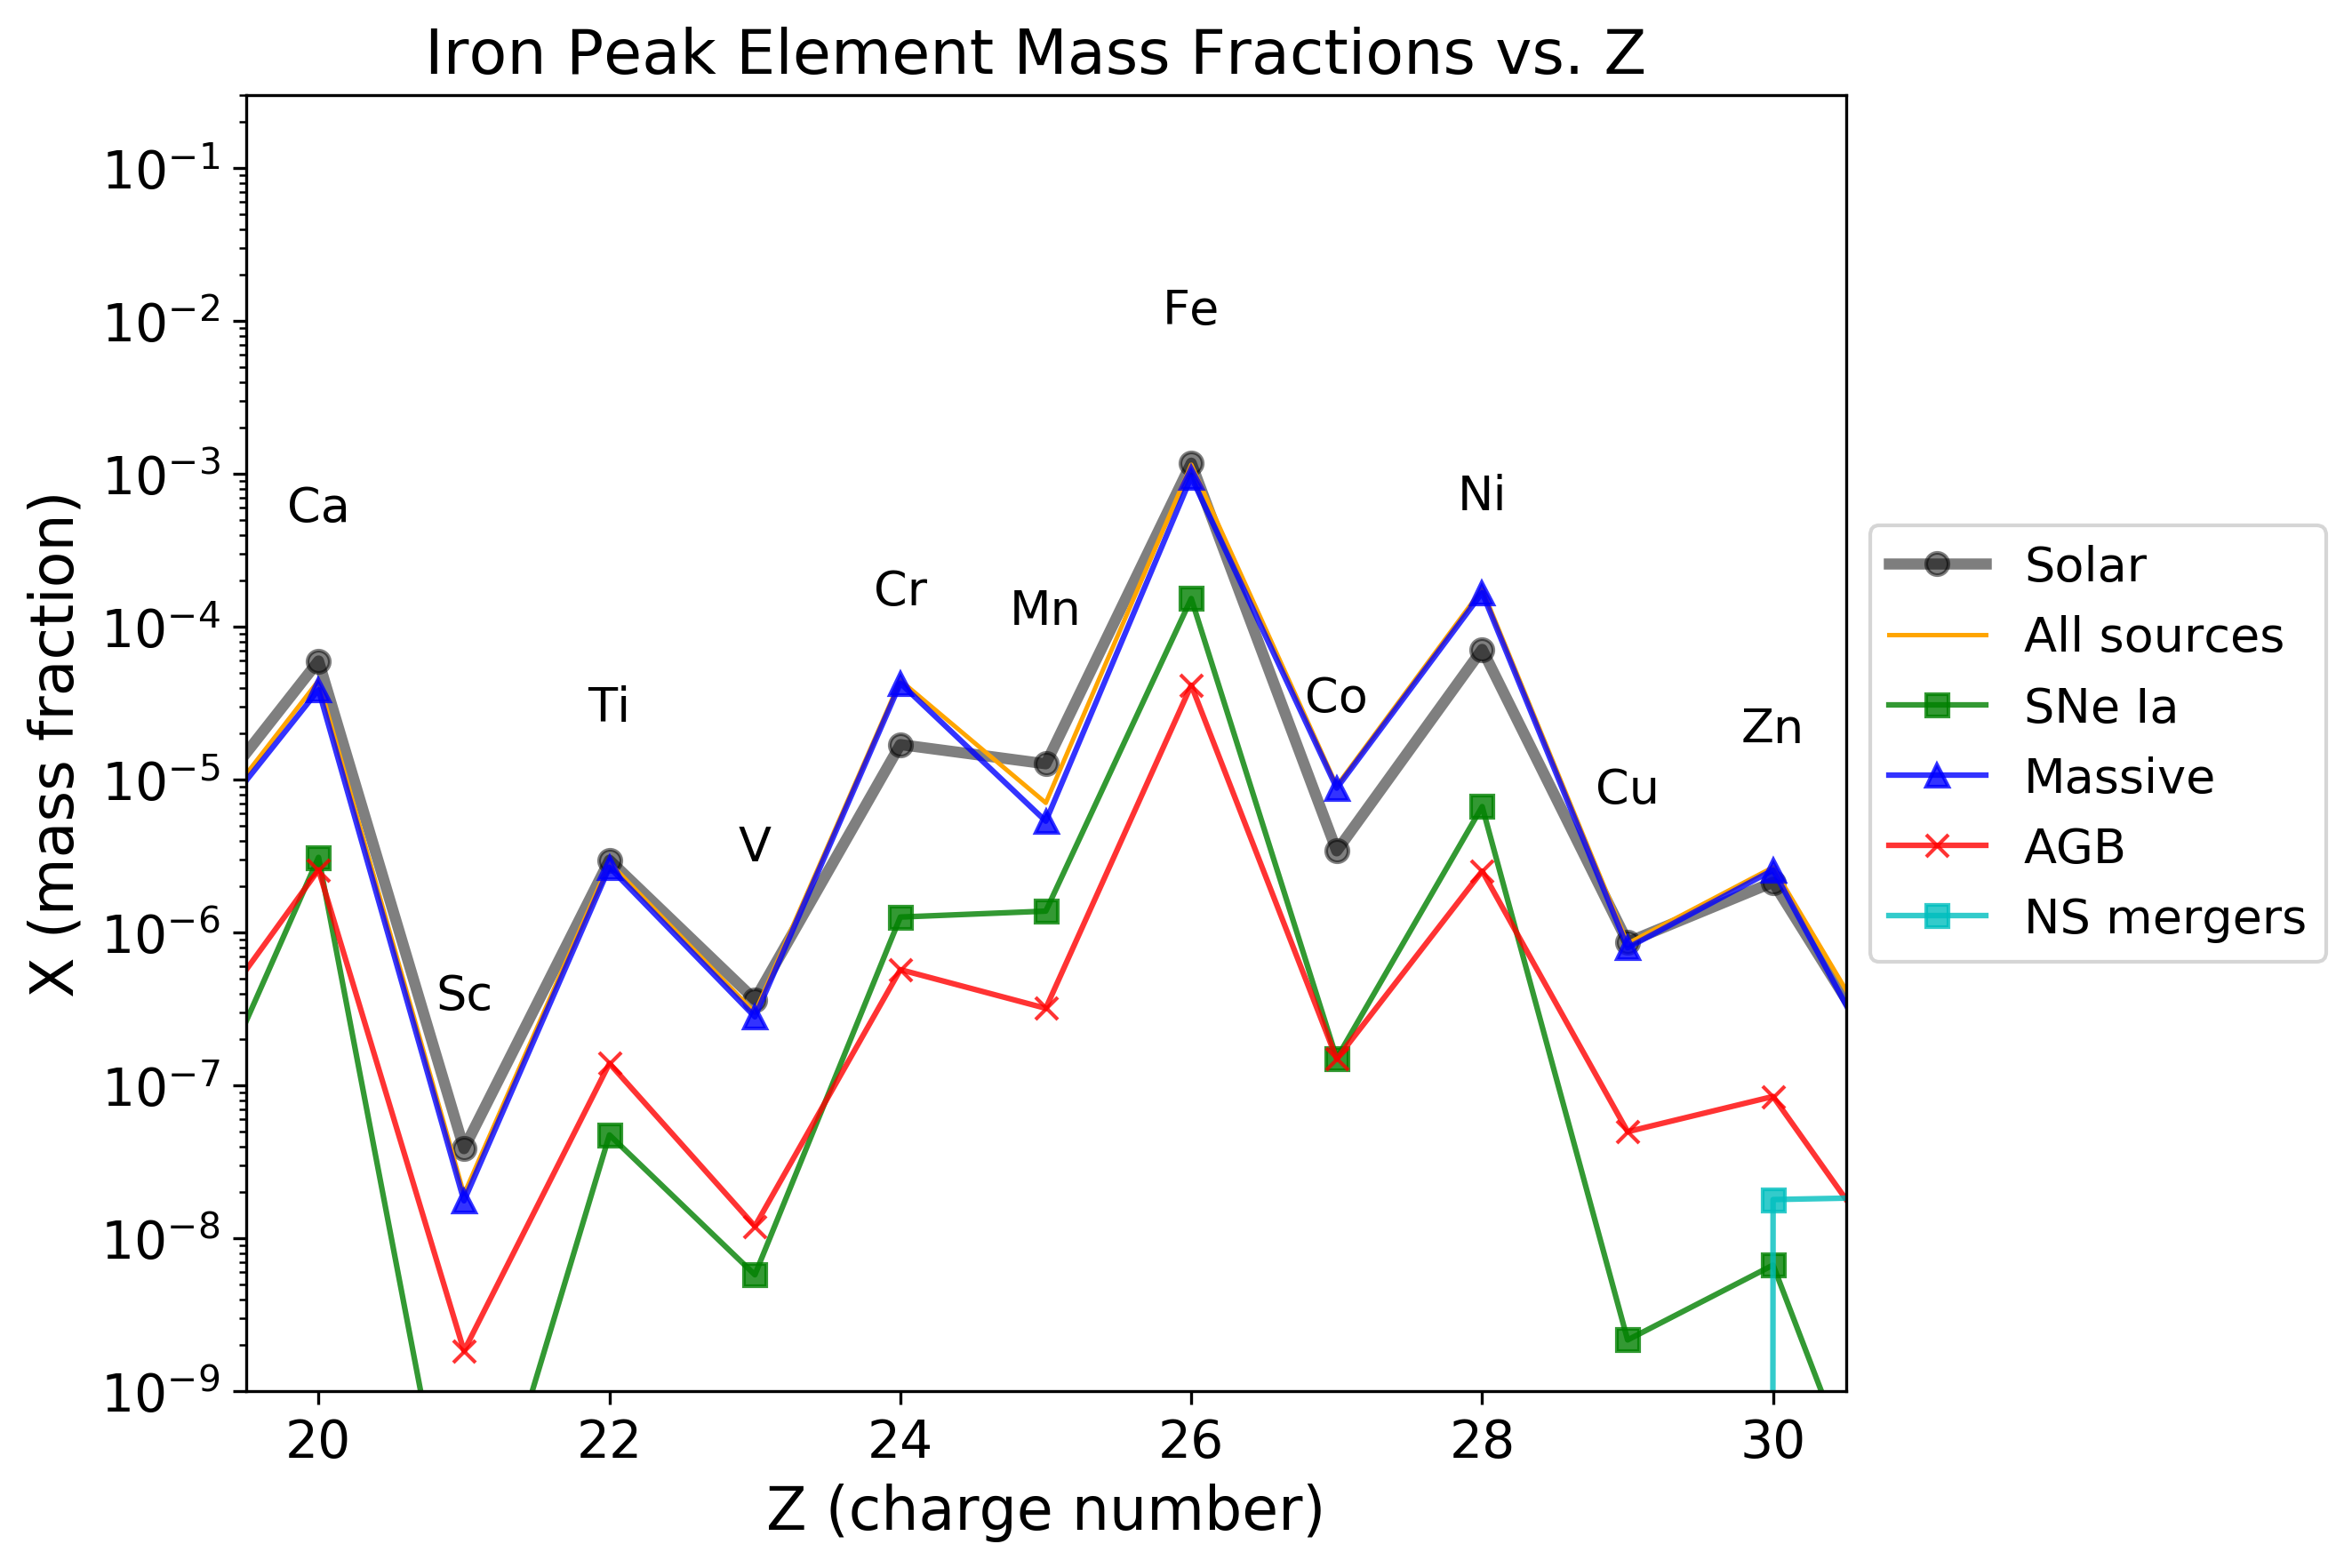

In [38]:

ifig=17; plt.close(ifig); plt.figure(ifig, figsize=(10,6), dpi=300)

# Plot solar abundance data
plt.plot(solar_Z, solar_ab, color='k', marker='o', linewidth=3, alpha=0.5, label='Solar')

# All sources combined
plt.plot(Z_charge, m_el_all, color='orange', label='All sources', alpha=1.0, linestyle='-', linewidth=1.2)

# Type Ia supernovae
plt.plot(Z_charge, m_el_sn1a, color='g', label='SNe Ia', alpha=0.8, linestyle='-', marker='s')

# Massive stars (core-collapse supernovae)
plt.plot(Z_charge, m_el_massive, color='b', label='Massive', alpha=0.8, linestyle='-', marker='^')

# AGB stars
plt.plot(Z_charge, m_el_agb, color='r', label='AGB', alpha=0.8, linestyle='-', marker='x')

# Neutron star mergers (r-process)
plt.plot(Z_charge, m_el_nsm, color='c', label='NS mergers', alpha=0.8, linestyle='-', marker='s')

# Add element annotations
for i in range(18,30):
    plt.annotate(elements[i], xy=(solar_Z[i],yy[i]), color='k',\
                 fontsize=13, ha='center', va='center')

# Label and axis
plt.legend(fontsize=13, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Z (charge number)', fontsize=16)
plt.ylabel('X (mass fraction)', fontsize=16)
plt.xlim(19.5,30.5)
plt.ylim(1e-9,3e-1)
plt.yscale('log')
plt.title('Iron Peak Element Mass Fractions vs. Z ')
#Frame tuning
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(right=0.75)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.14)

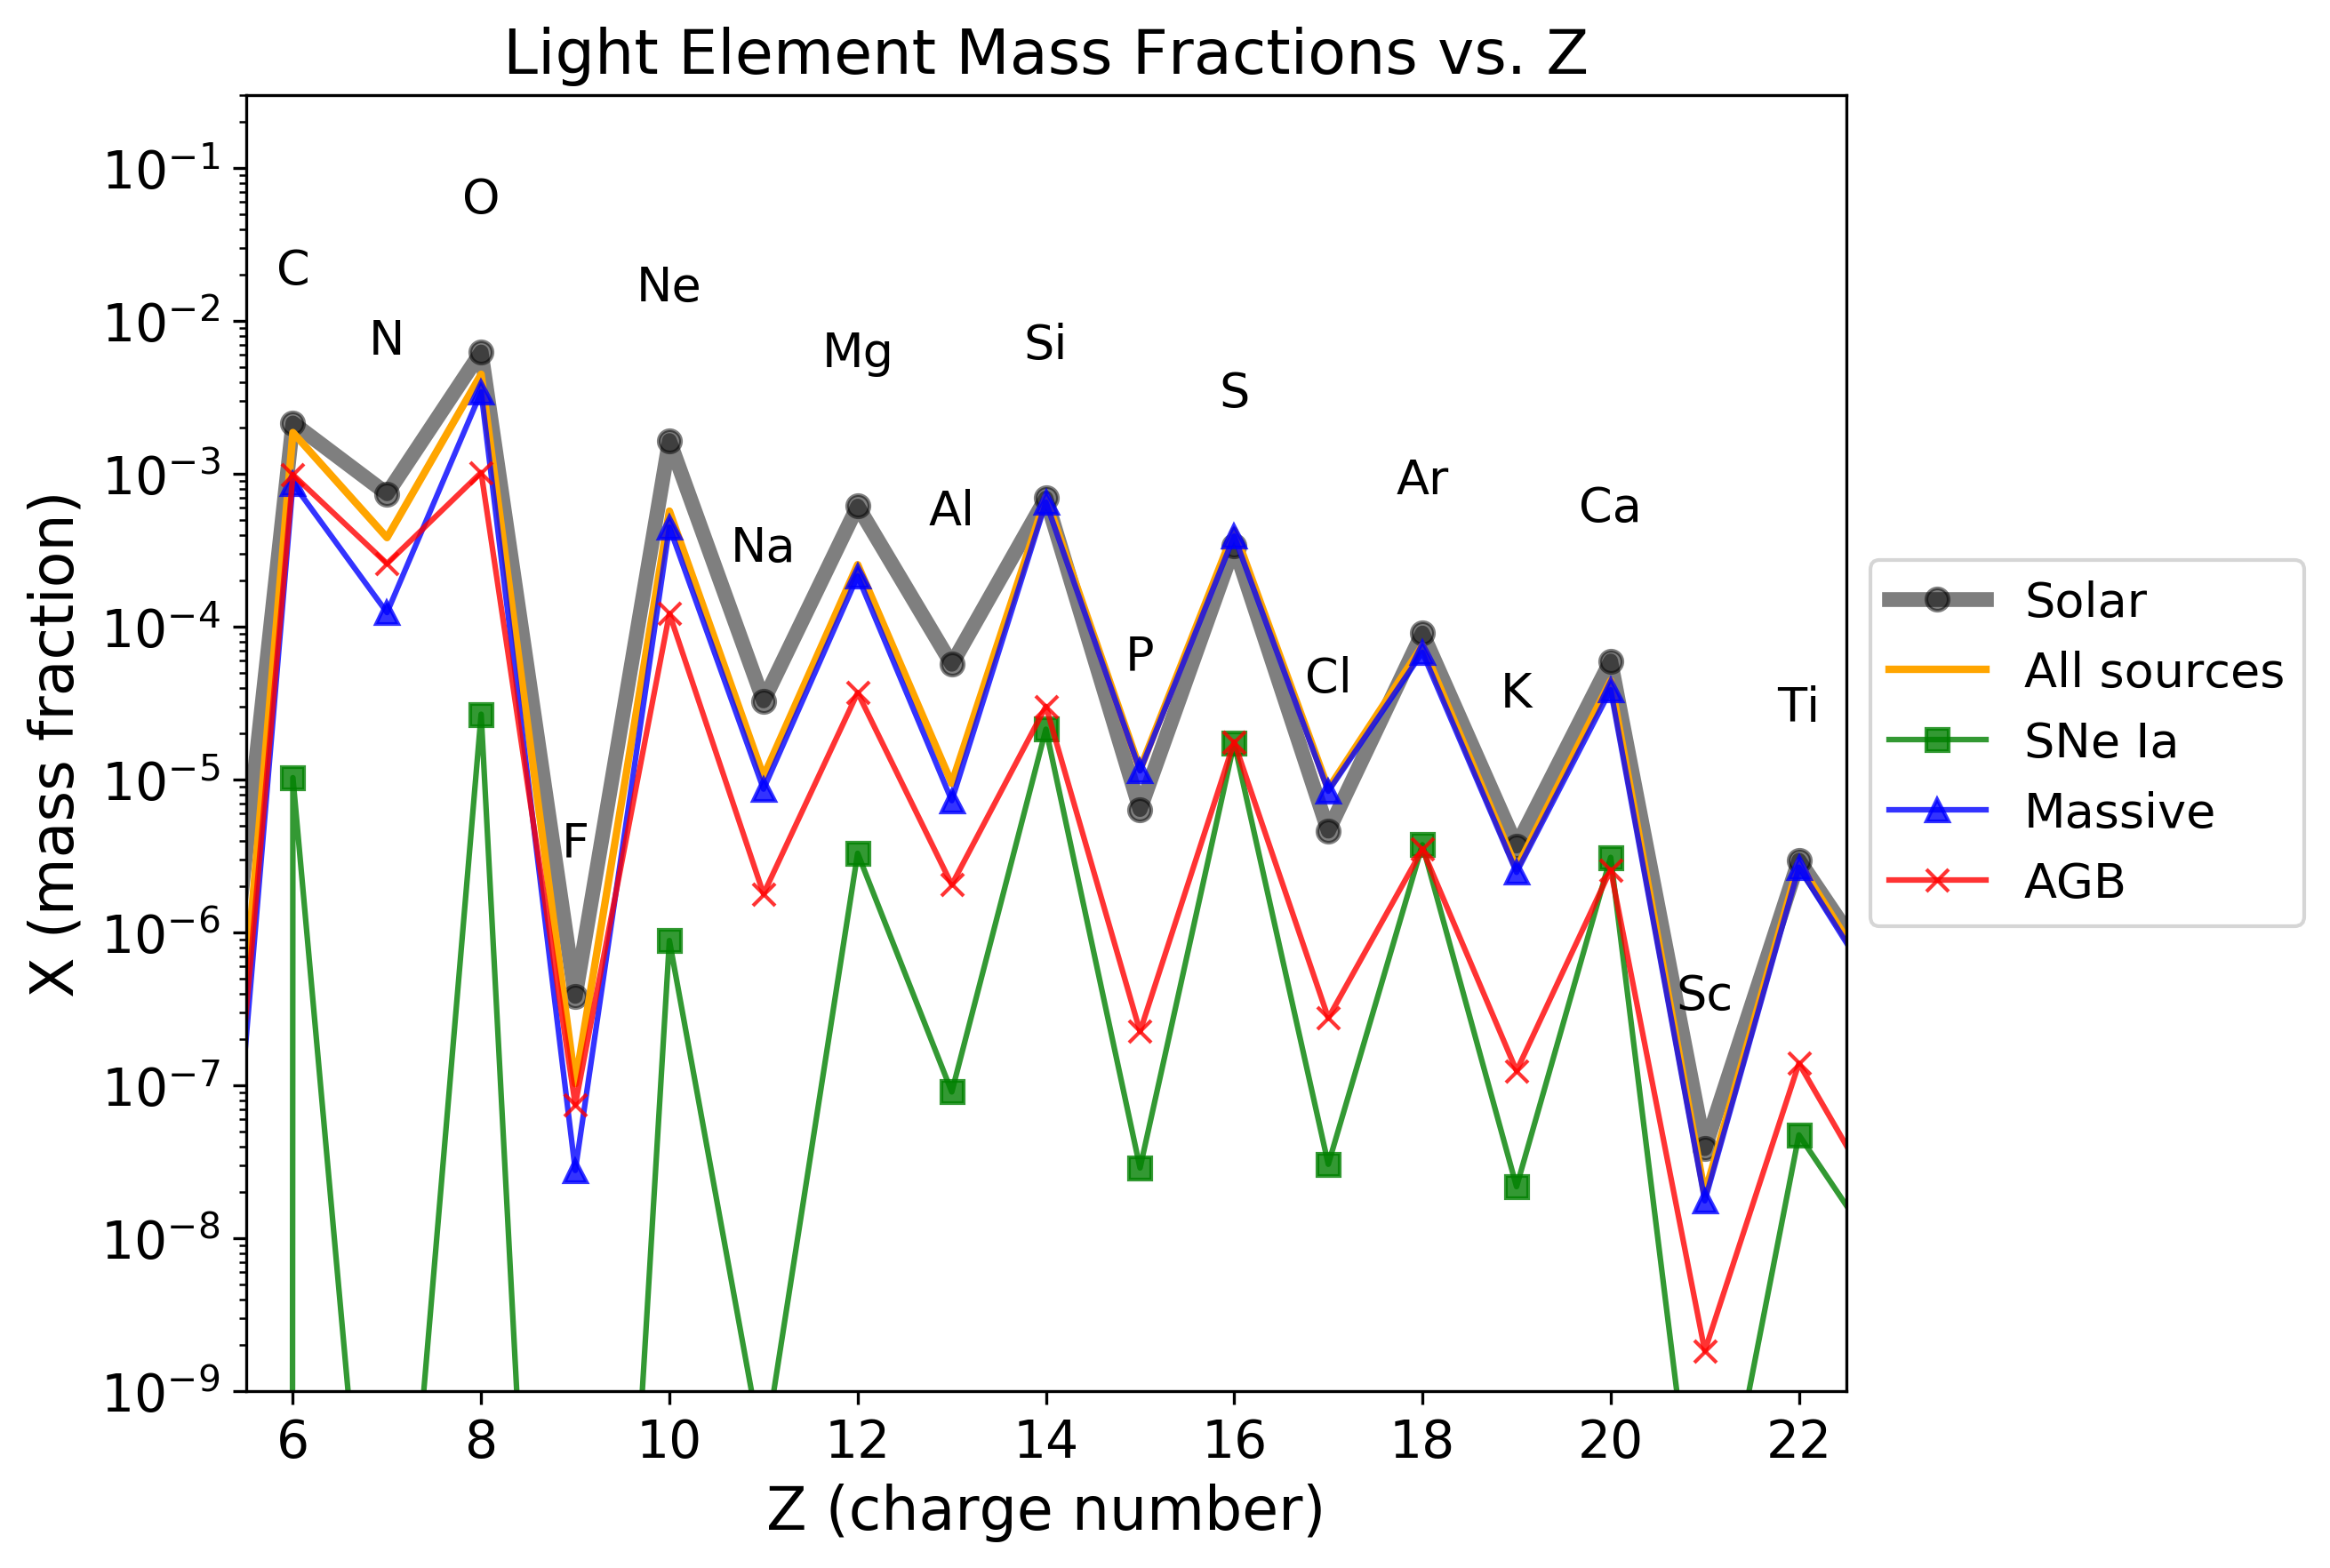

In [39]:
# Define the figure size
ifig=17; plt.close(ifig); plt.figure(ifig, figsize=(10,6), dpi=300)



# Plot solar abundance data
plt.plot(solar_Z, solar_ab, color='k', marker='o', linewidth=4, alpha=0.5, label='Solar')

# All sources combined
plt.plot(Z_charge, m_el_all, color='orange', label='All sources', alpha=1.0, linestyle='-', linewidth=2)

# Type Ia supernovae
plt.plot(Z_charge, m_el_sn1a, color='g', label='SNe Ia', alpha=0.8, linestyle='-', marker='s')

# Massive stars (core-collapse supernovae)
plt.plot(Z_charge, m_el_massive, color='b', label='Massive', alpha=0.8, linestyle='-', marker='^')

# AGB stars
plt.plot(Z_charge, m_el_agb, color='r', label='AGB', alpha=0.8, linestyle='-', marker='x')

# Neutron star mergers (r-process)
#plt.plot(Z_charge, m_el_nsm, color='c', label='NS mergers', alpha=0.8, linestyle='-', marker='s')

# Add element annotations
for i in range(5,22):
    plt.annotate(elements[i], xy=(solar_Z[i],yy[i]), color='k',\
                 fontsize=13, ha='center', va='center')

# Label and axis
plt.legend(fontsize=13, loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Z (charge number)', fontsize=16)
plt.ylabel('X (mass fraction)', fontsize=16)
plt.xlim(5.5,22.5)
plt.ylim(1e-9,3e-1)
plt.yscale('log')
plt.title('Light Element Mass Fractions vs. Z')
# Frame tuning
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(right=0.75)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.14)

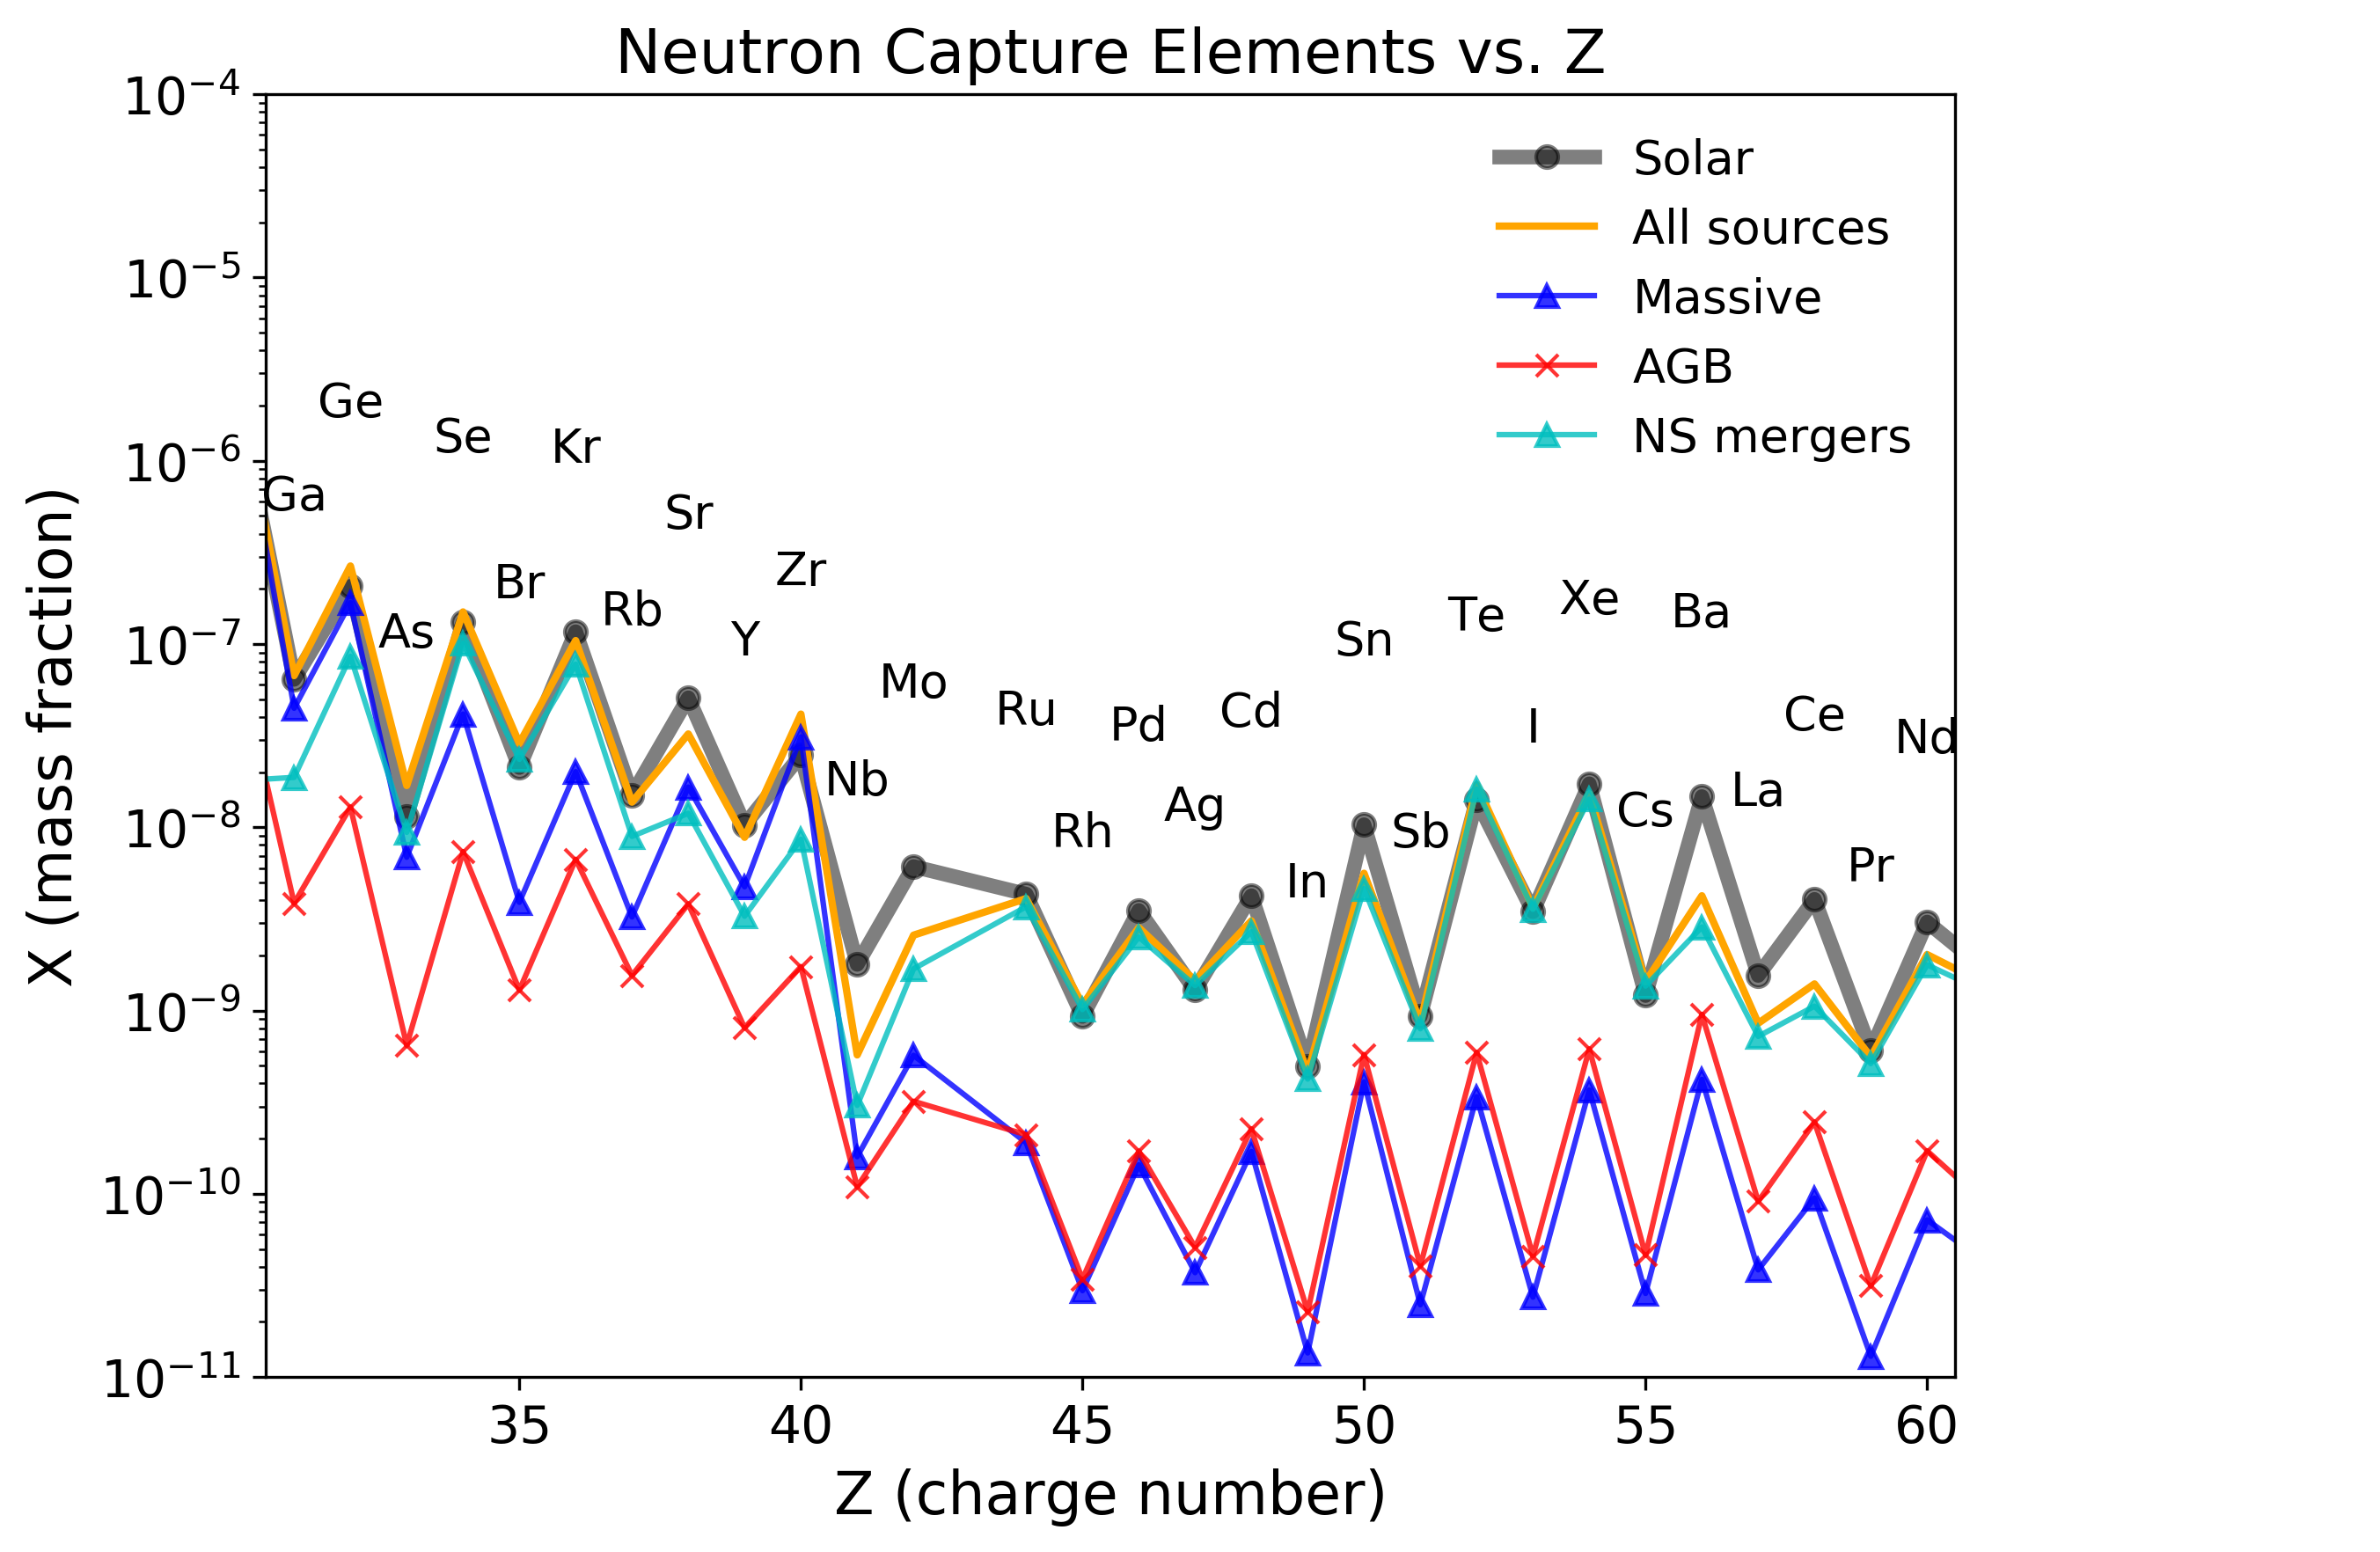

In [40]:
# Define the figure size
ifig=17; plt.close(ifig); plt.figure(ifig, figsize=(8,6), dpi=300)



# Plot solar abundance data
plt.plot(solar_Z, solar_ab, color='k', marker='o', linewidth=4, alpha=0.5, label='Solar')

# All sources combined
plt.plot(Z_charge, m_el_all, color='orange', label='All sources', alpha=1.0, linestyle='-', linewidth=2)

# Type Ia supernovae
#plt.plot(Z_charge, m_el_sn1a, color='g', label='SNe Ia', alpha=0.8, linestyle='-', marker='s')

# Massive stars (core-collapse supernovae)
plt.plot(Z_charge, m_el_massive, color='b', label='Massive', alpha=0.8, linestyle='-', marker='^')

# AGB stars
plt.plot(Z_charge, m_el_agb, color='r', label='AGB', alpha=0.8, linestyle='-', marker='x')

# Neutron star mergers (r-process)
plt.plot(Z_charge, m_el_nsm, color='c', label='NS mergers', alpha=0.8, linestyle='-', marker='^')

# Add element annotations
for i in range(30,65):
    plt.annotate(elements[i], xy=(solar_Z[i],yy[i]), color='k',\
                 fontsize=13, ha='center', va='center')

# Label and axis
plt.legend(fontsize=13, frameon=False)
plt.xlabel('Z (charge number)', fontsize=16)
plt.ylabel('X (mass fraction)', fontsize=16)
plt.xlim(30.5,60.5)
plt.ylim(1e-11,1e-4)
plt.yscale('log')
plt.title('Neutron Capture Elements vs. Z')
# Frame tuning
plt.subplots_adjust(top=0.95)
plt.subplots_adjust(right=0.95)
plt.subplots_adjust(left=0.15)
plt.subplots_adjust(bottom=0.14)

In [41]:
# now we look to analyze the 20 mass Z = 0.01 stars to see whats up:

from nugridpy import mesa as ms
from nugridpy import nugridse as mp

data_dir="/data/ASDR/NuGrid"  

ms.set_nugrid_path(data_dir)
mp.set_nugrid_path(data_dir)

In [56]:
# stars with masses 19, 20, 21:
s_19 = ms.star_log(mass=16,Z=0.01)
s_20 = ms.star_log(mass=20,Z=0.01)
s_21 = ms.star_log(mass=24,Z=0.01)

sp_19= mp.se(mass=15,Z=0.01)
sp_20= mp.se(mass=20,Z=0.01)
sp_21= mp.se(mass=25,Z=0.01)

s_13_zr = ms.star_log(mass=13,Z=0.006)
s_15_zr = ms.star_log(mass=15,Z=0.006)
s_17_zr = ms.star_log(mass=17,Z=0.006)

sp_13_zr= mp.se(mass=13,Z=0.006)
sp_15_zr= mp.se(mass=15,Z=0.006)
sp_17_zr= mp.se(mass=17,Z=0.006)

sp_15_cl1= mp.se(mass=15,Z=0.01)
sp_15_cl2= mp.se(mass=15,Z=0.02)
s_15_cl1 = ms.star_log(mass=15,Z=0.01)
s_15_cl2 = ms.star_log(mass=15,Z=0.02)







nugrid_path = /data/ASDR/NuGrid
closest set is set1.1 (Z = 0.01)
closest mass is 15.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...
nugrid_path = /data/ASDR/NuGrid
closest set is set1.1 (Z = 0.01)
closest mass is 20.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...
nugrid_path = /data/ASDR/NuGrid
closest set is set1.1 (Z = 0.01)
closest mass is 25.0
Using old star.logsa file ...
 reading ...100% 

Closing star.log  tool ...
nugrid_path = /data/ASDR/NuGrid
closest set is set1.1 (Z = 0.01)
closest mass is 15.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools
nugrid_path = /data/ASDR/NuGrid
closest set is set1.1 (Z = 0.01)
closest mass is 20.0
Searching files, please wait.......
Reading preprocessor files
File search complete.
Closing plot_tools
nugrid_path = /data/ASDR/NuGrid
closest set is set1.1 (Z = 0.01)
closest mass is 25.0
Searching files, please wait.......
Reading prep

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus model number
plotting contours


/usr/local/lib/python3.6/dist-packages/nugridpy/mesa.py:2513: UserWarning: Log scale: values of z <= 0 have been masked
  locator=matplotlib.ticker.LogLocator())
/usr/local/lib/python3.6/dist-packages/nugridpy/mesa.py:2516: UserWarning: Log scale: values of z <= 0 have been masked
  locator=matplotlib.ticker.LogLocator())


plotting patches
plotting abund boundaries


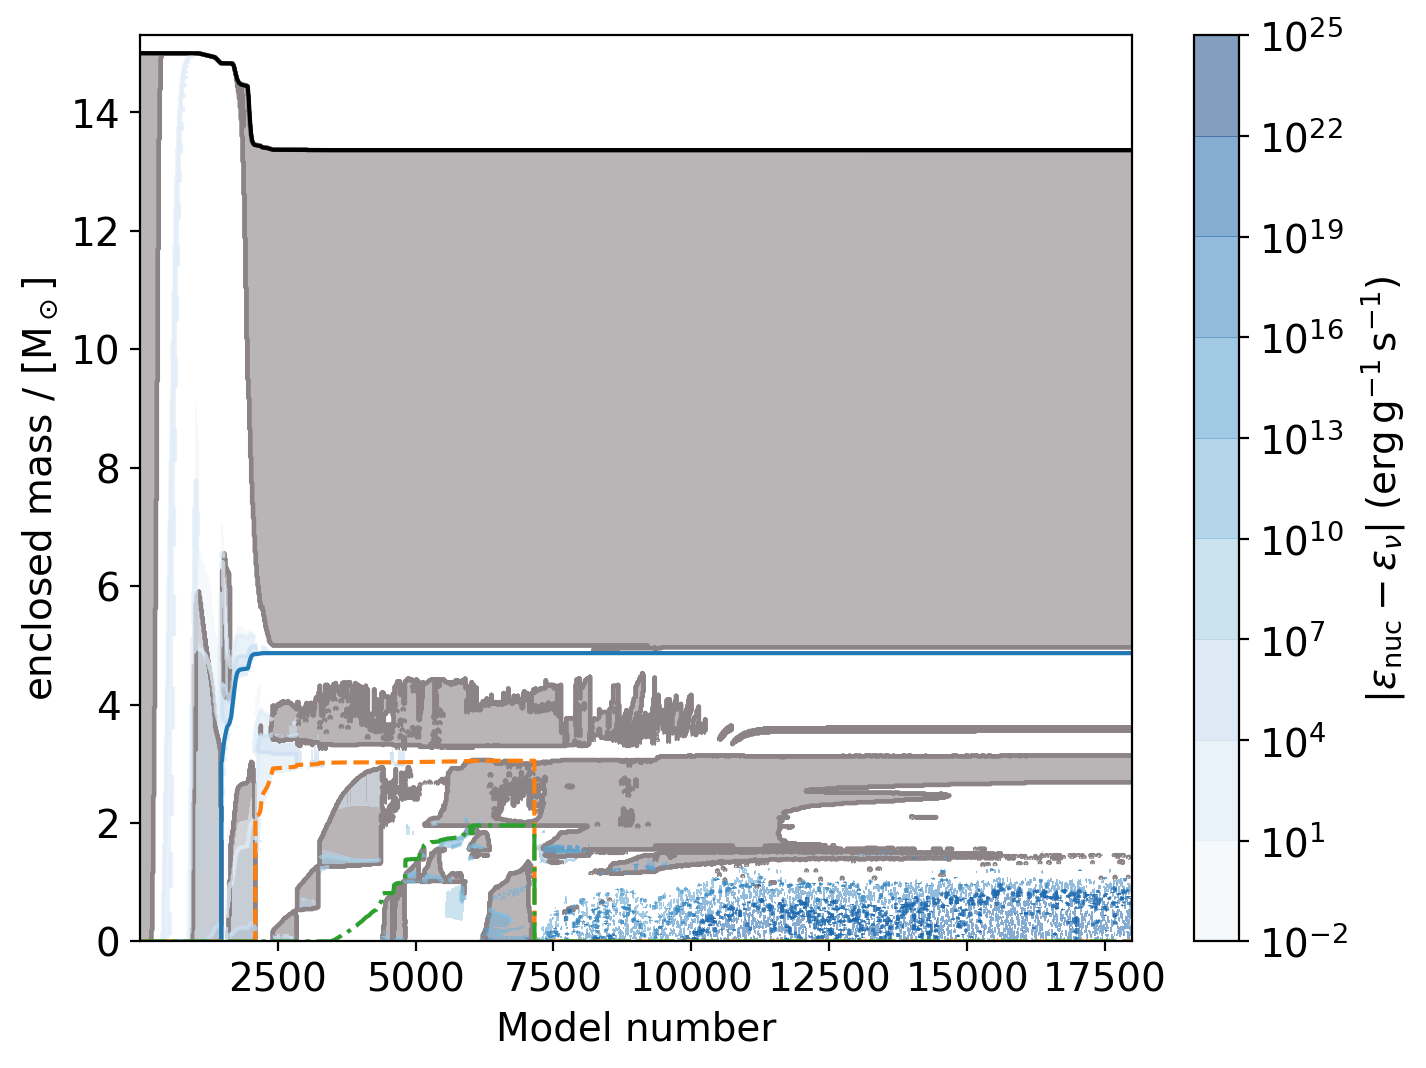

In [43]:
ifig=20; plt.close(ifig); plt.figure(ifig, figsize=(8,6), dpi=200)

s_19.kip_cont(ifig=ifig)#,xlims=[29000,45000],ylims=[0.56,0.66])

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus time left
plotting contours


/usr/local/lib/python3.6/dist-packages/nugridpy/mesa.py:2400: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=pl.axes()


plotting patches
plotting abund boundaries


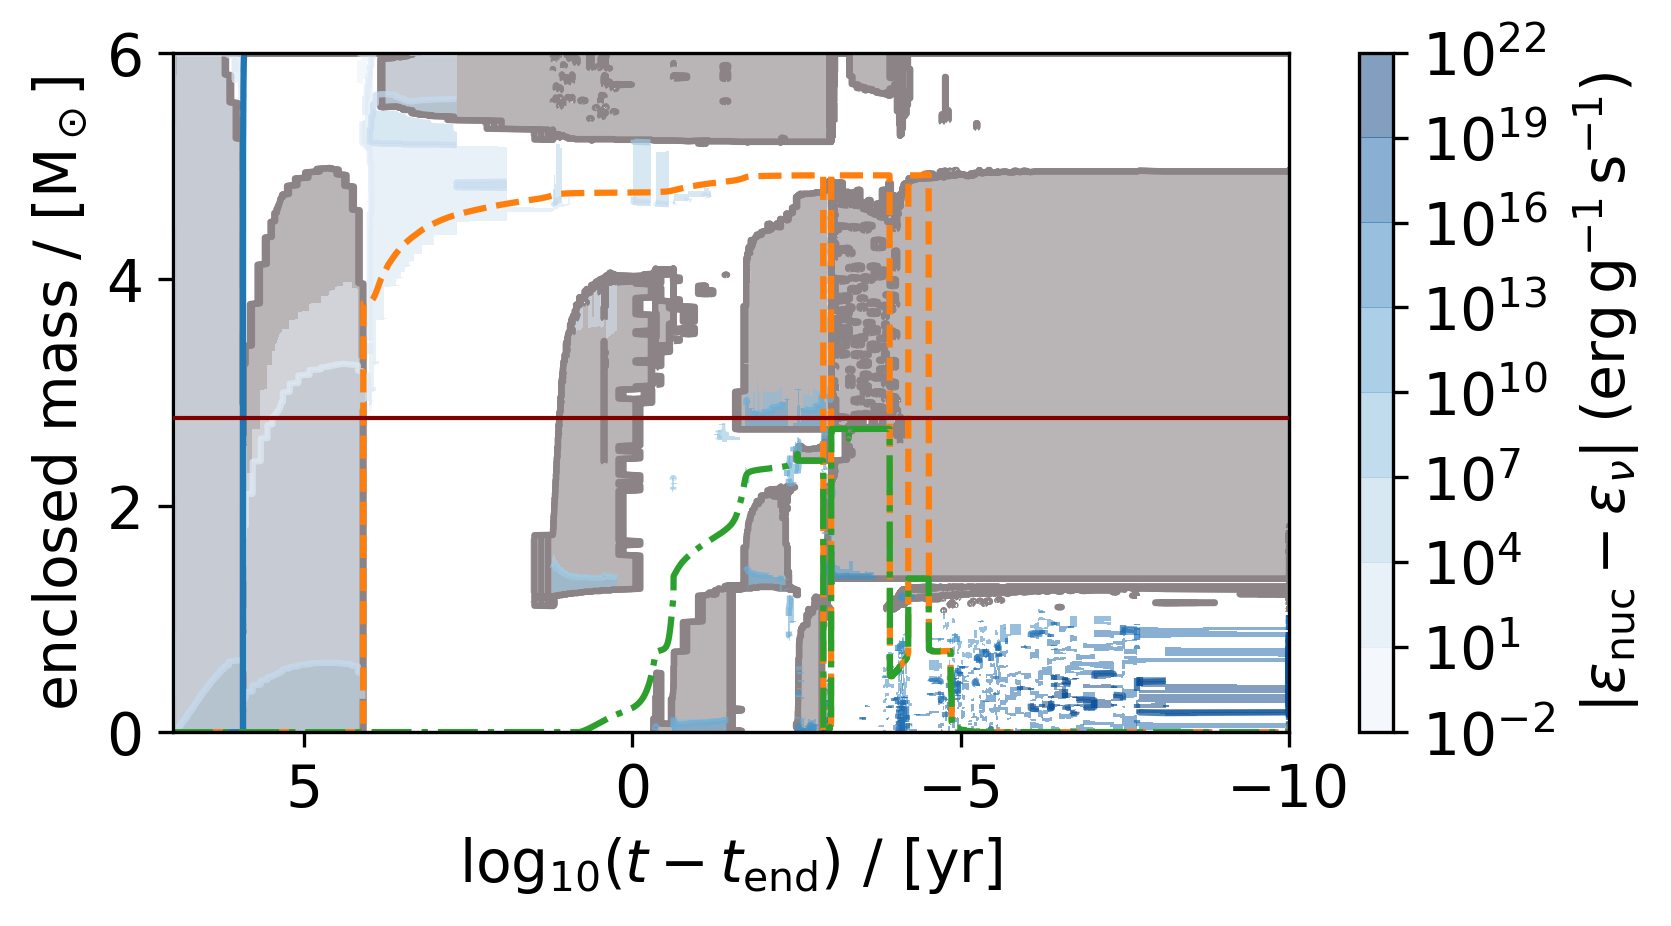

In [44]:
ifig=21; plt.close(ifig); plt.figure(ifig, figsize=(6,3), dpi=300)
plt.axhline( y=2.77, linestyle='-', color='maroon', label='Mass Cut', zorder=10, linewidth=1)

#plt.title(r'Kippenhahn for $M/M_{\ast}<6$ ')
s_20.kip_cont(ifig=ifig,ylims=[0,6],ixaxis='log_time_left')#,xlims=[29000,45000],ylims=[0.56,0.66])

plt.show()

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus model number
plotting contours
plotting patches
plotting abund boundaries


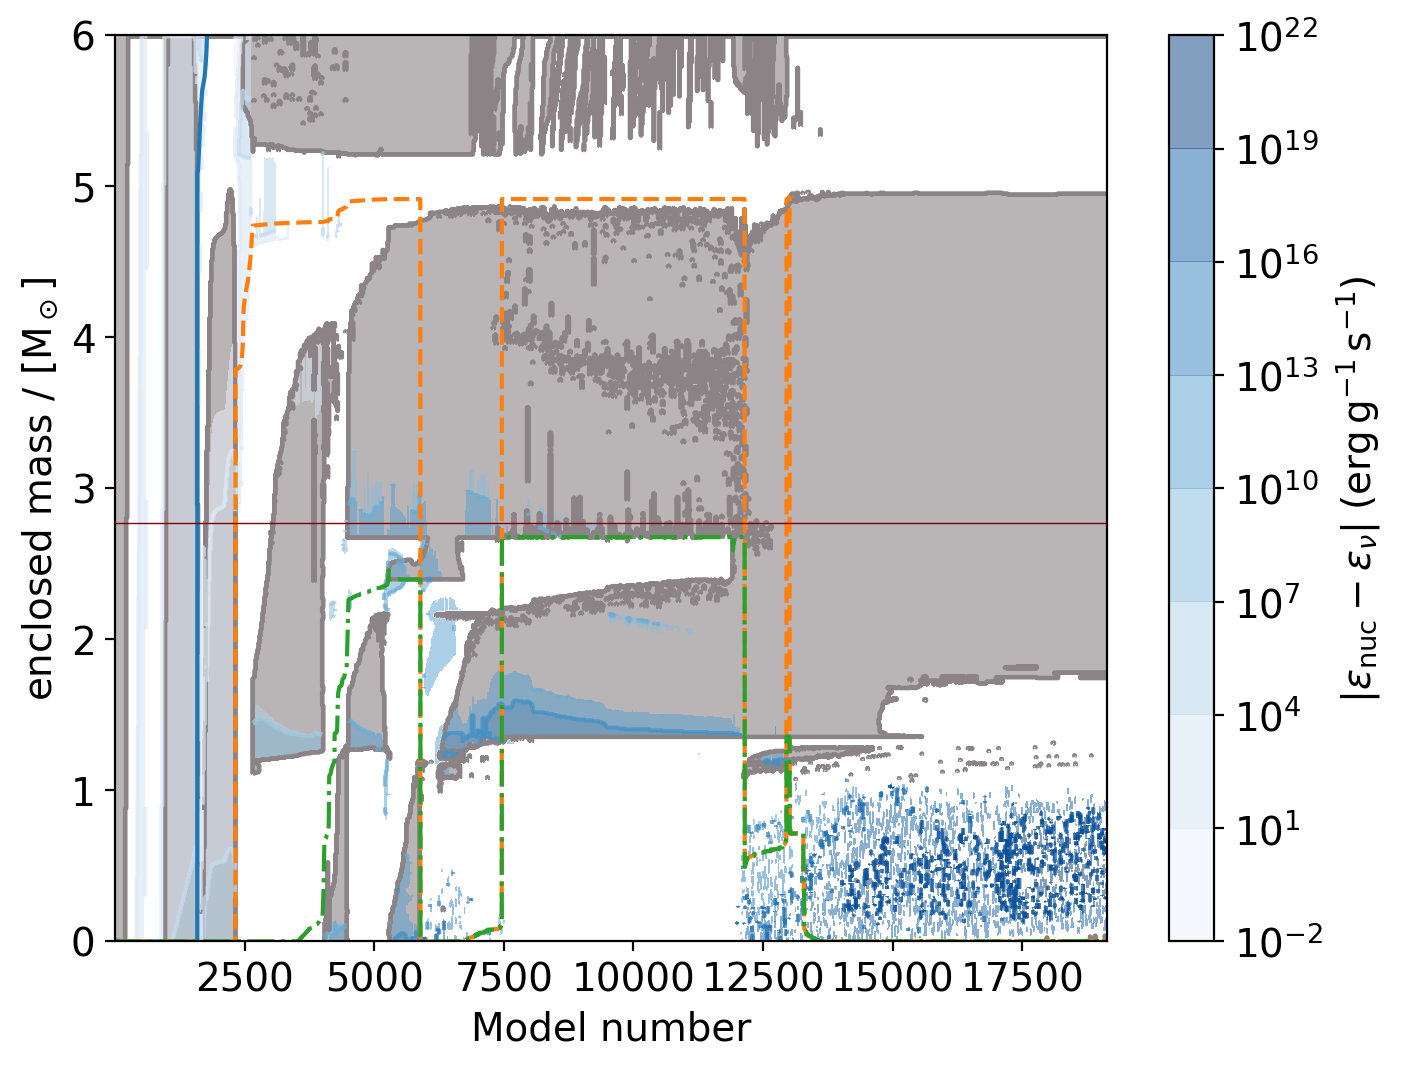

In [45]:
ifig=21; plt.close(ifig); plt.figure(ifig, figsize=(8,6), dpi=200)
plt.axhline( y=2.77, linestyle='-', color='maroon', label='Mass Cut', zorder=10, linewidth=0.5)


s_20.kip_cont(ifig=ifig,ylims=[0,6])#,xlims=[29000,45000],ylims=[0.56,0.66])


plt.show()

 reading ['iso_massf']...100%

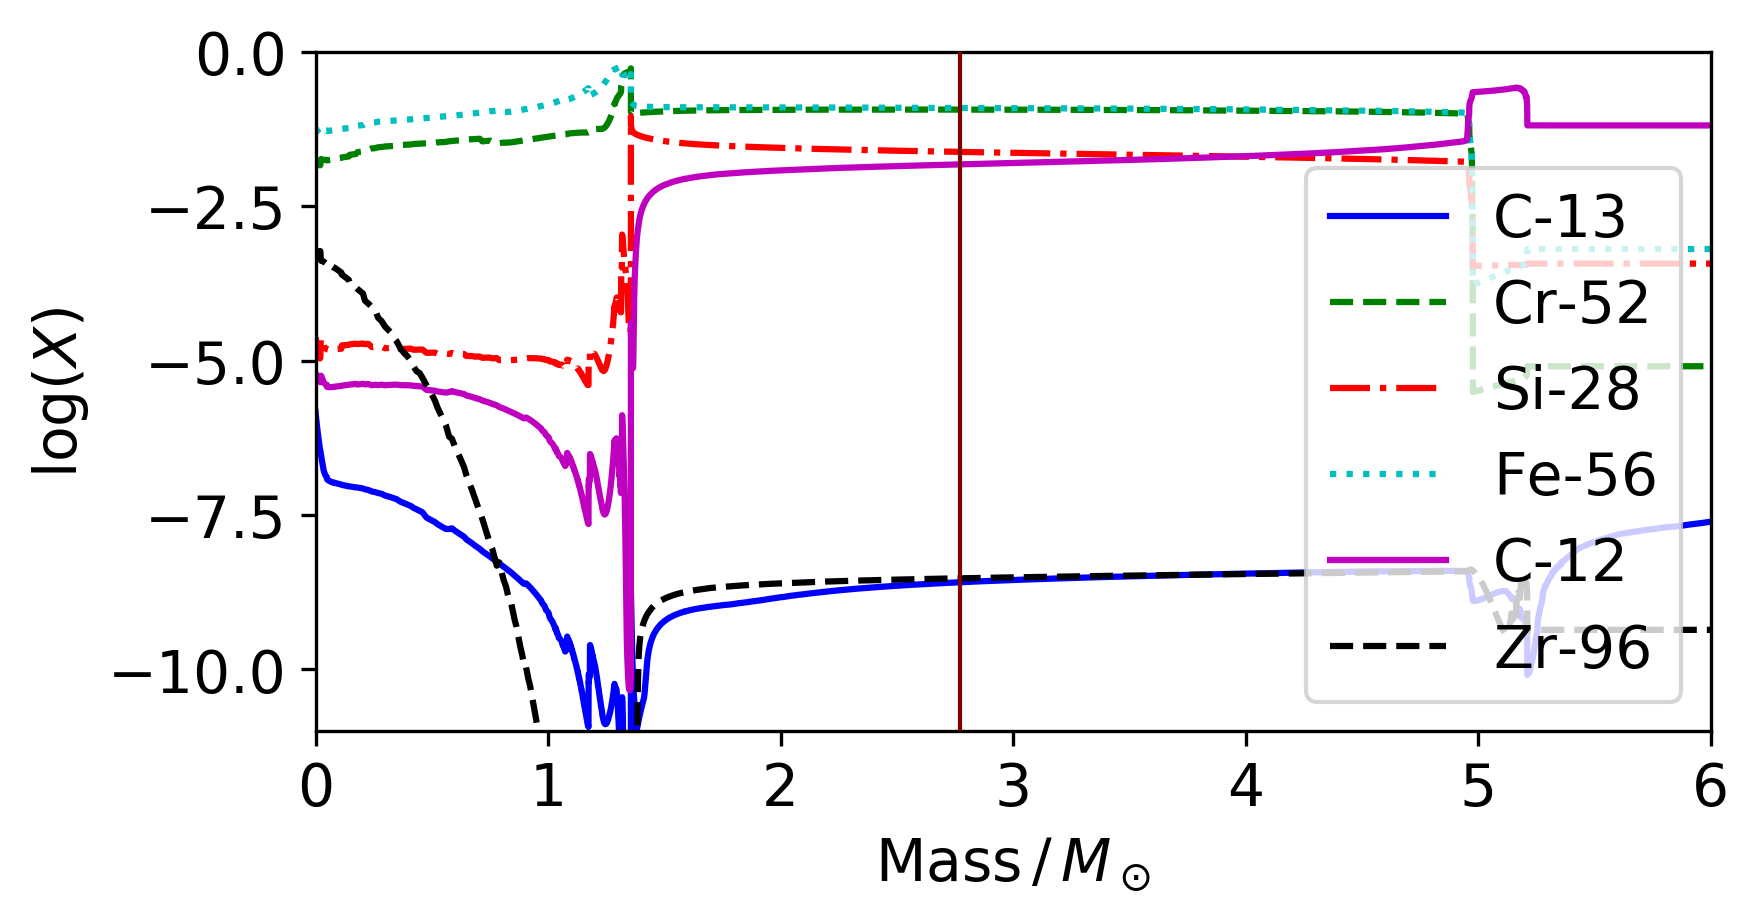

In [46]:
species=['C-13','Cr-52','Si-28','Fe-56', 'C-12', 'Zr-96']

ifig=5;plt.close(ifig);fig, ax = plt.subplots(1,1, figsize=(6,3),dpi=300)

sp_20.abu_profile(isos=species, ifig=1, fname=23000, logy=True)
plt.ylim(-11,0)
plt.xlim(0,6)
plt.legend(loc='lower right')
plt.axvline(x=2.77, linestyle='-', color='maroon', label='Mass Cut', zorder=10, linewidth=1)
#plt.title(r'Model Before Detonation with Mass Cut at $Mass/M_{\ast} =2.77$ ')
#xlim(0.613536,0.613561)

plt.show()

In [47]:
ben = ms.mesa_profile(mass=20, Z=0.01, num=17000)

nugrid_path = /data/ASDR/NuGrid
closest set is set1.1 (Z = 0.01)
closest mass is 20.0
392 in profiles.index file ...
Found and load nearest profile for cycle 17000
reading profile/data/ASDR/NuGrid/data/set1ext/set1.1/see_wind/M20.0Z1.0e-02/LOGS/log349.data ...
 reading ...100% 



In [48]:
#ben.cols

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus time left
plotting contours
plotting patches
plotting abund boundaries


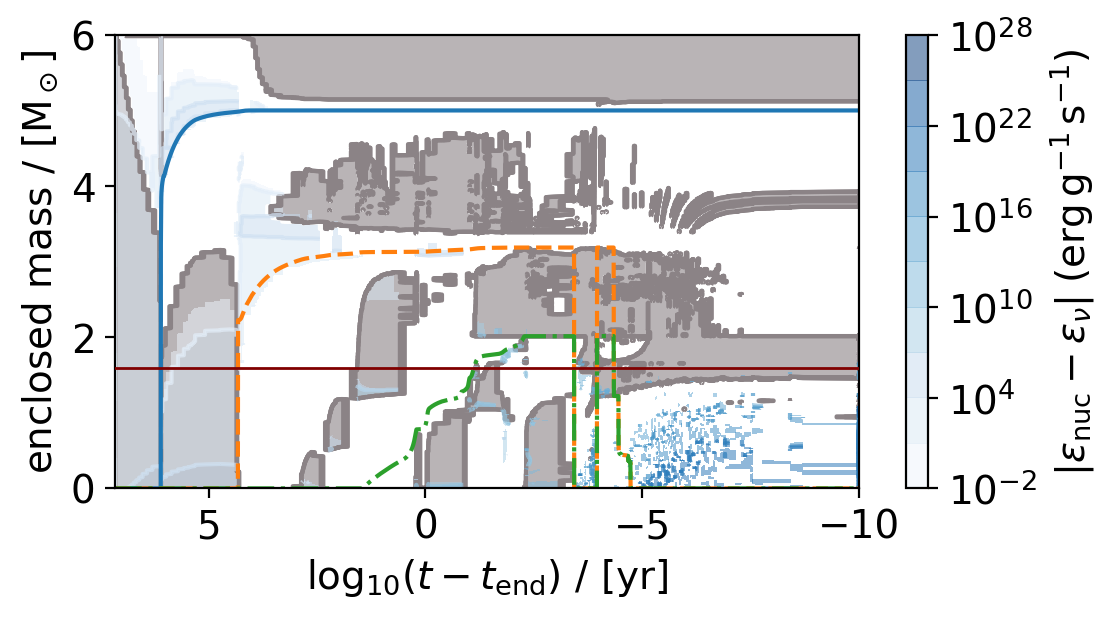

In [49]:
ifig=28; plt.close(ifig); plt.figure(ifig, figsize=(6,3), dpi=200)
plt.axhline( y=1.6, linestyle='-', color='maroon', label='Mass Cut', zorder=10, linewidth=1)

#plt.title(r'Kippenhahn for $M/M_{\ast}<6$ with BH Mass Cut ')

s_15_zr.kip_cont(ifig=ifig,ylims=[0,6],ixaxis='log_time_left')#,xlims=[29000,45000],ylims=[0.56,0.66])

plt.show()

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus model number
plotting contours
plotting patches
plotting abund boundaries


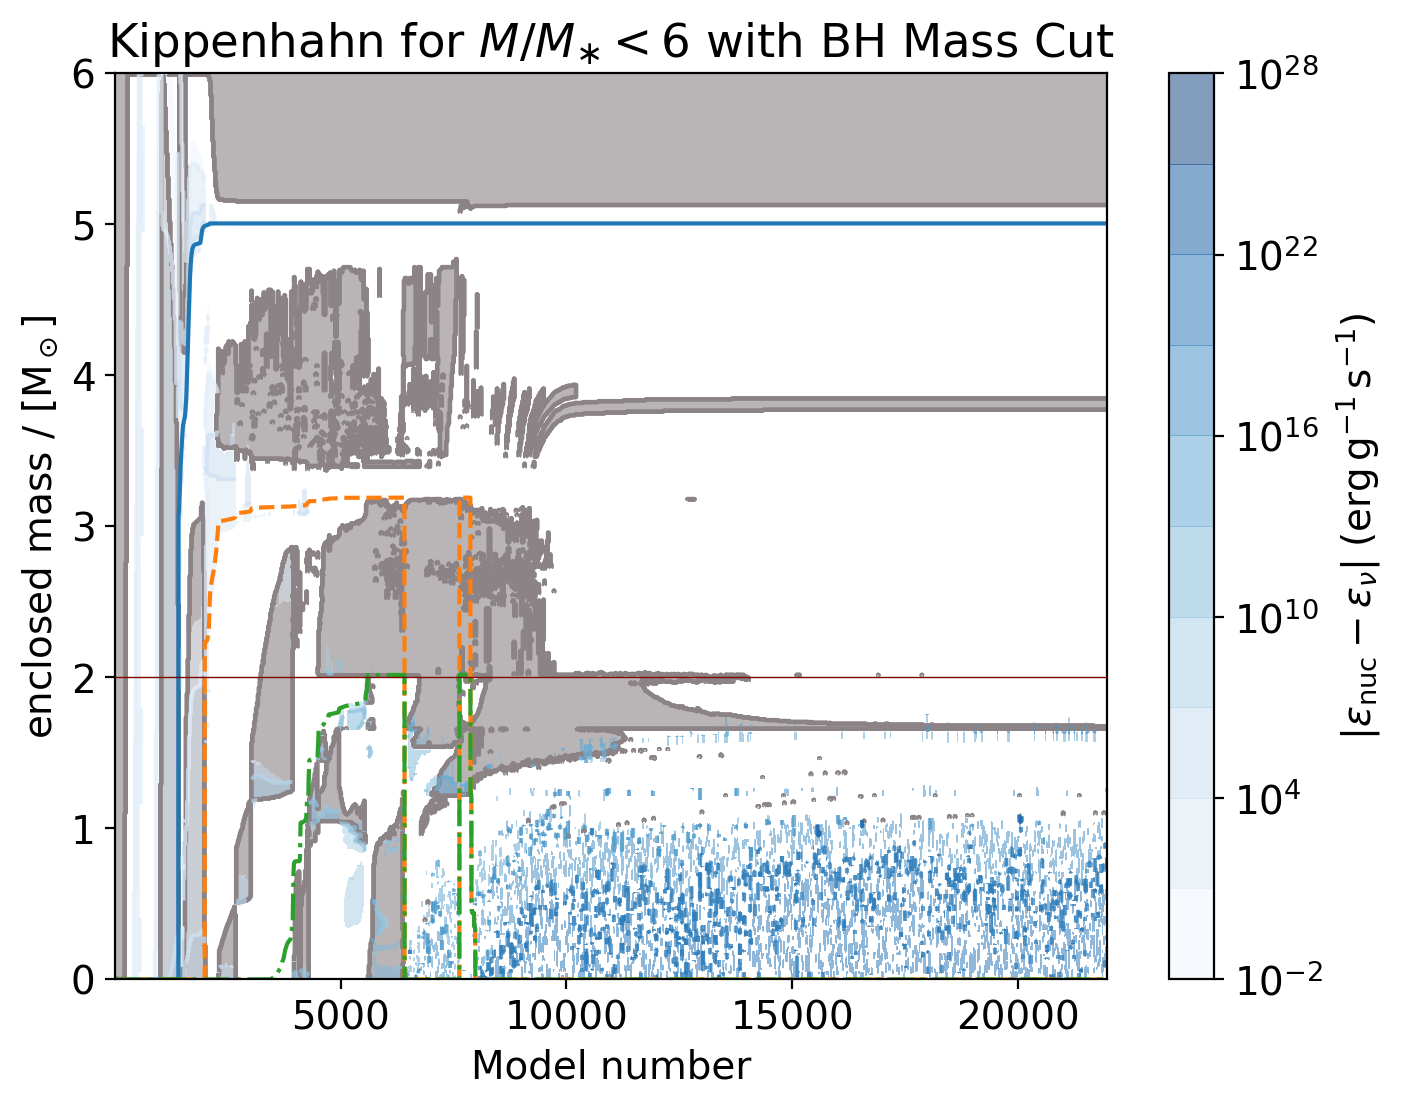

In [50]:
ifig=28; plt.close(ifig); plt.figure(ifig, figsize=(8,6), dpi=200)
plt.axhline( y=2., linestyle='-', color='maroon', label='Mass Cut', zorder=10, linewidth=0.5)

plt.title(r'Kippenhahn for $M/M_{\ast}<6$ with BH Mass Cut ')


s_15_zr.kip_cont(ifig=ifig,ylims=[0,6])#,xlims=[29000,45000],ylims=[0.56,0.66])

plt.show()

 reading ['iso_massf']...100%

/usr/local/lib/python3.6/dist-packages/nugridpy/data_plot.py:4745: RuntimeWarning: divide by zero encountered in log10
  y = np.log10(abunds if len(risos) < 2 else abunds[i])


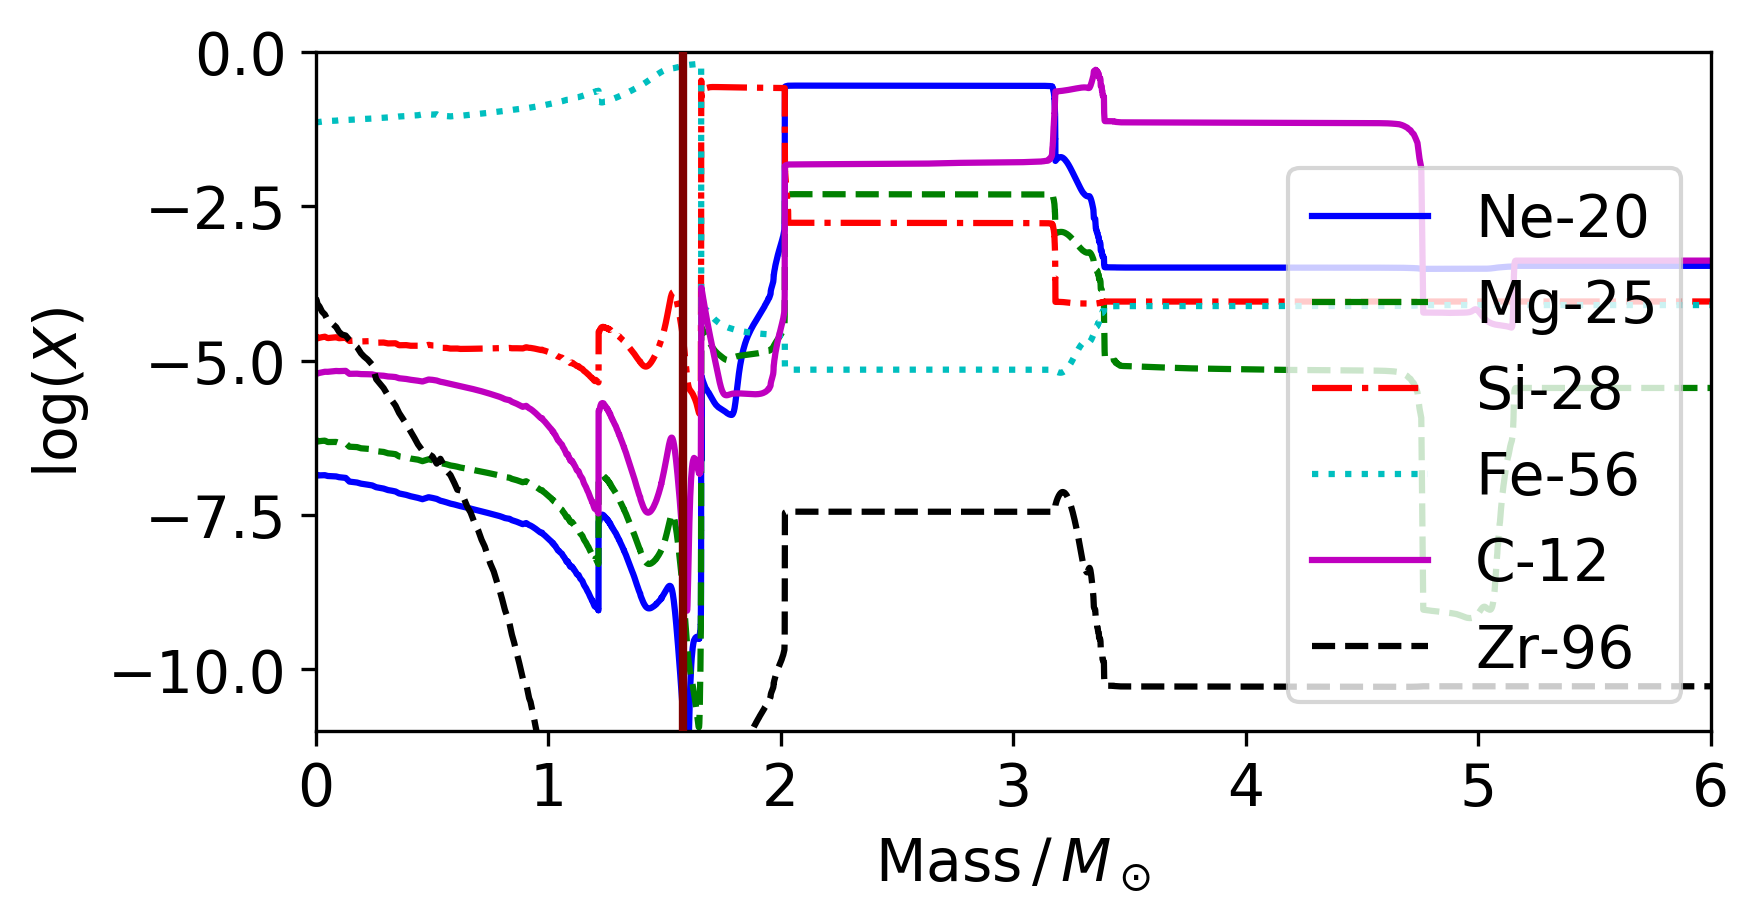

In [51]:
species=['Ne-20','Mg-25','Si-28','Fe-56', 'C-12', 'Zr-96']#,'Zr-97']

ifig=57;plt.close(ifig);fig, ax = plt.subplots(1,1, figsize=(6,3),dpi=300)

sp_15_zr.abu_profile(isos=species, ifig=1, fname=29000, logy=True)
plt.ylim(-11,0)
plt.xlim(0,6)
plt.legend(loc='lower right')
plt.axvline(x=1.58, linestyle='-', color='maroon', label='Mass Cut', zorder=10, linewidth=2.)
#plt.title(r'Model Before Detonation with Mass Cut at $Mass/M_{\ast} =2.0$ ')
#xlim(0.613536,0.613561)

plt.show()

 creating color map burn ...100% 

 creating color map mix ...100% 

engenstyle was  full
mixstyle was  full

 finished preparing color map
plot versus model number
plotting contours
plotting patches
plotting abund boundaries


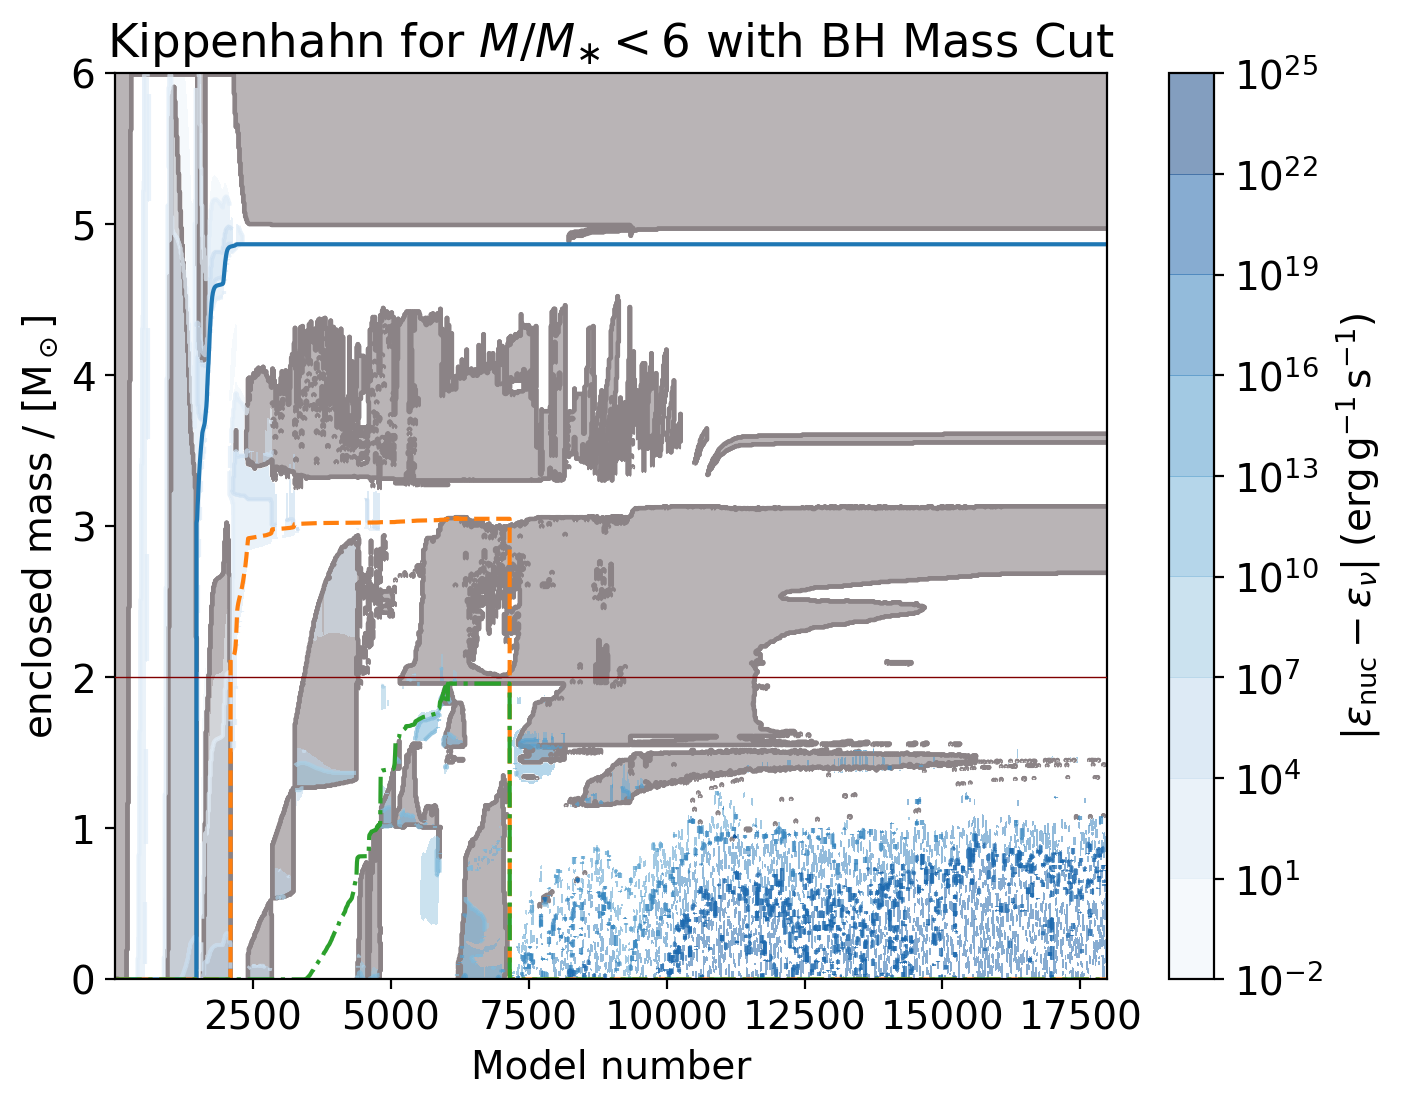

In [57]:
ifig=28; plt.close(ifig); plt.figure(ifig, figsize=(8,6), dpi=200)
plt.axhline( y=2., linestyle='-', color='maroon', label='Mass Cut', zorder=10, linewidth=0.5)

plt.title(r'Kippenhahn for $M/M_{\ast}<6$ with BH Mass Cut ')


s_15_cl1.kip_cont(ifig=ifig,ylims=[0,6])#,xlims=[29000,45000],ylims=[0.56,0.66])

plt.show()

In [52]:
def remnant(M, Z):
    rem = 1.1 + 0.2*np.exp((M-11)/4) - (2.0+Z) *np.exp(0.4*(M-26))
    
    return rem

def remnantr(M, Z):
    rem = 1.1 + 0.2*np.exp((M-11)/7.5) + 10*(1.0+Z) *np.exp(-(M-23.5)**2 / ((1.0+Z)**2))
    
    return rem

In [53]:
print(remnant(20, 0.01))

2.8152040811599863


In [54]:
print(remnant(15, 0.006))

1.619028021846254
